# Data Mining / Prospecção de Dados

## Sara C. Madeira and André Falcão, 2019/20

# Project 2 - Clustering

## Logistics

**In a "normal" scenario students should work in teams of 2 people. Due to the social distance imposed by current public health situation, students were allowed to work in groups of 1 and 3. In this context, the amount of work was adapted according to the number of students in groups as described below.**

* Tasks **1 to 5** should be done by **all** groups
* Task **6** should be done only by **groups of 2 and 3** students
* Task **7** should be done only by **groups of 3** students

The quality of the project will then dictate its grade.

**The project's solution should be uploaded in Moodle before the end of May, 17th 2020 (23:59).** 

**It is mandatory to produce a Jupyter notebook containing code and text/images/tables/etc describing the solution and the results. Projects not delivered in this format will not be graded. Note that you can use `PD_201920_Project2.ipynb`as template.**

Students should **upload a `.zip` file** containing all the files necessary for project evaluation. 

**Decisions should be justified and results should be critically discussed.**

## Dataset and Tools

In this project you should use [Python 3](https://www.python.org), [Jupyter Notebook](http://jupyter.org) and **[Scikit-learn](http://scikit-learn.org/stable/)**.

The dataset to be analysed is **`AML_ALL_PATIENTS_GENES_EXTENDED.csv`**. This is an extended version of the widely studied **Leukemia dataset**, originally published by Golub et al. (1999) ["Molecular Classification of Cancer: Class Discovery and Class Prediction by Gene
Expression Monitoring"](http://archive.broadinstitute.org/mpr/publications/projects/Leukemia/Golub_et_al_1999.pdf.) 

**This dataset studies patients with leukaemia. At disease onset clinicials diagnosed them in two different types of leukaemia: acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).** Some of these diagnoses were later confirmed, other revealed to be wrong. The data analyzed here contains the expression levels of 5147 Human genes (features/columns) analyzed in 110 patients (rows): 70 ALL and 40 AML.
Each row identifies a patient: The first column, `ID`, contains the patients' IDs , the second column, `DIAGNOSIS`, contains the initial diagnosis as performed by clinicians (ground truth), and the remaining 5147 columns contain the expression levels of the 5147 genes analysed.

**The goal is to cluster patients and (ideally) find AML groups and ALL groups.**


<img src="AML_ALL_PATIENTS_GENES_EXTENDED.jpg" alt="AML_ALL_PATIENTS_GENES_EXTENDED.csv" style="width: 1000px;"/>

## 1. Load and Preprocess Dataset

At the end of this step you should have:
* a 110 rows × 5147 columns matrix, **X**, containing the values of the 5147 features for each of the 110 patients.
* a vector, **y**, with the 110 diagnosis, which you can use later to evaluate clustering quality.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df_data = pd.read_csv('AML_ALL_PATIENTS_GENES_EXTENDED.csv')
df_data.shape

(110, 5149)

In [3]:
df_data.head()

,ID,DIAGNOSIS,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,1,ALL,-0.912181,-0.936280,1.330679,0.045416,0.236442,0.196788,0.244435,2.561725,...,0.428940,1.018678,0.103263,-0.518375,0.019140,0.027771,0.122186,0.593119,-0.391378,-0.161117
1,2,ALL,0.842926,-1.311323,-0.067011,-0.964423,-0.224387,-0.200579,-0.371600,-0.417306,...,-0.425219,-0.474402,-0.067901,0.555431,0.160143,0.003223,-0.043618,0.032103,-0.576990,0.415146
2,3,ALL,1.076941,-0.788133,1.859748,1.151430,0.498175,1.244393,1.390191,0.664072,...,2.304741,-0.273350,1.493964,1.747818,-0.568816,0.797680,2.306901,0.705322,-0.331659,-0.261337
3,4,ALL,-1.596222,-0.874097,0.991127,0.574379,-0.065558,-0.044040,-0.402063,0.488835,...,-0.000930,-0.288936,0.691636,0.548844,-0.552853,-0.342677,-0.653193,-1.336776,-0.496289,-1.514082
4,5,ALL,-0.192137,-0.655253,-0.193356,-0.651854,0.142487,-0.176496,-0.286980,-0.274163,...,-0.721104,-0.471285,-0.206971,-0.063819,0.325090,-1.183998,0.049037,0.099424,-0.609271,0.139542


In [4]:
X = df_data.iloc[:, 2:]
y = df_data.iloc[:, 1]
X.shape, y.shape

((110, 5147), (110,))

In [5]:
X.head()

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-0.912181,-0.936280,1.330679,0.045416,0.236442,0.196788,0.244435,2.561725,2.489963,1.794520,...,0.428940,1.018678,0.103263,-0.518375,0.019140,0.027771,0.122186,0.593119,-0.391378,-0.161117
1,0.842926,-1.311323,-0.067011,-0.964423,-0.224387,-0.200579,-0.371600,-0.417306,-0.408754,-0.002931,...,-0.425219,-0.474402,-0.067901,0.555431,0.160143,0.003223,-0.043618,0.032103,-0.576990,0.415146
2,1.076941,-0.788133,1.859748,1.151430,0.498175,1.244393,1.390191,0.664072,0.542223,0.548277,...,2.304741,-0.273350,1.493964,1.747818,-0.568816,0.797680,2.306901,0.705322,-0.331659,-0.261337
3,-1.596222,-0.874097,0.991127,0.574379,-0.065558,-0.044040,-0.402063,0.488835,0.247321,0.266520,...,-0.000930,-0.288936,0.691636,0.548844,-0.552853,-0.342677,-0.653193,-1.336776,-0.496289,-1.514082
4,-0.192137,-0.655253,-0.193356,-0.651854,0.142487,-0.176496,-0.286980,-0.274163,0.379259,-0.311094,...,-0.721104,-0.471285,-0.206971,-0.063819,0.325090,-1.183998,0.049037,0.099424,-0.609271,0.139542


In [6]:
y.head()

0    ALL
1    ALL
2    ALL
3    ALL
4    ALL
Name: DIAGNOSIS, dtype: object

In [7]:
y.value_counts()

ALL    70
AML    40
Name: DIAGNOSIS, dtype: int64

## 2. Dimensionality Reduction

As you already noticed the number of features (genes) is extremely high whe compared to the number of objects to cluster (patients). In this context, you should perform dimensionality reduction, that is, reduce the number of features, in two ways:

* [**Removing features with low variance**](http://scikit-learn.org/stable/modules/feature_selection.html)

* [**Using Principal Component Analysis**](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

At the end of this step you should have two new matrices with the same number of rows, each with a different number of columns (features): **X_variance** and **X_PCA**. 

**Don't change X you will need it!**

### 2.1 Removing features with low variance

Lets remove the features with the low variance. Low variance features are less informative about the reality they are describing.

In [8]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=1.25)
X_variance = sel.fit_transform(X)
X_variance.shape

(110, 31)

### 2.2 Removing features using PCA

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [10]:
def create_columns(num_components):
    x_axis = []
    columns = []
    for i in range(1, num_components + 1): 
        x_axis.append('PC{}'.format(i))
        columns.append('Principal Component {}'.format(i))
    return x_axis, columns

def pca(df, num_components):
    p = PCA(n_components = num_components)
    principal_components = p.fit_transform(df)
    x_axis, columns = create_columns(num_components)
    df_pca_output = pd.DataFrame({'var':p.explained_variance_ratio_, 'PC':x_axis})
    return pd.DataFrame(data = principal_components, columns = columns), df_pca_output,p

Standardize the data (mean 0 and std 1) and apply PCA

In [11]:
X_STANDARD = StandardScaler().fit(X).transform(X)
df_unsupervised_pca, df_pca, p = pca(X_STANDARD, len(X_STANDARD))

Analyse the results

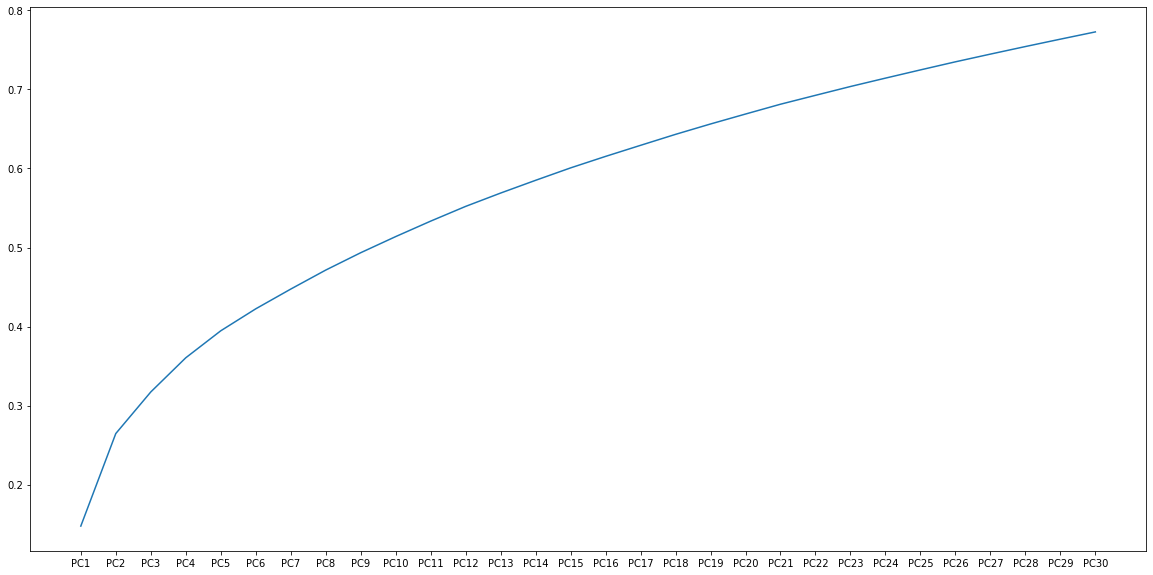

In [12]:
take = 30
plt.figure(figsize=(20,10))
plt.plot(df_pca['PC'].iloc[:take],np.cumsum(p.explained_variance_ratio_)[:take])

The figure above shows us that by retaining the first 30 components we maintain almost 80% of the data variance.

Lets save the PCA output in 'X_PCA' object, by retaining just 30 components. 

In [13]:
df_unsupervised_pca2, _ , _ = pca(X_STANDARD, 30)
X_PCA = df_unsupervised_pca2.values

### 2.3 Visualize the data using t-SNE

Now lets apply t-distributed Stochastic Neighbor Embedding (t-SNE). t-SNE is a tool to visualize high-dimensional data, and we will use it in order to reduce the dimension of our data to just 2 components, and visualize them. 

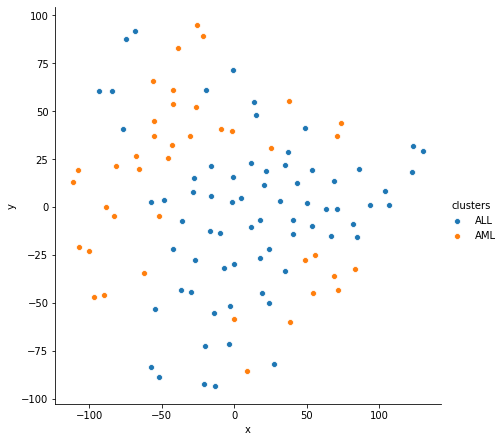

In [14]:
df_plot_tsne = pd.DataFrame(TSNE(n_components=2).fit_transform(X),columns=['x','y'])
df_plot_tsne['clusters'] =y
sns.pairplot(x_vars=["x"], y_vars=["y"], data=df_plot_tsne, hue="clusters", height=6)

By looking to the data distribution in space, we can see that it will be a difficult clustering task if we would compare our clusters with the 'diagnosis' feature.

## 3. Clustering Patients using Partitional Clustering

Use **`K`-means** to cluster the patients:

* Cluster the original data (5147 features): **X**.
    * Use different values of `K`.
    * For each value of `K` present the clustering by specifying how many patients ALL and AML are in each cluster.     
    For instance, `{0: {'ALL': 70, 'AML': 0}, 1: {'ALL': 0, 'AML': 40}}` is the ideal clustering that we aimed at obtained with K-means when `K=2`, where the first cluster has 70 ALL patients and 0 AML patients and the second cluster has 0 ALL patients and 40 AML patients. 
    You can choose how to output this information.  
    * What is the best value of `K` ? Justify using the clustering results and the [Silhouette score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

* Cluster the data obtained after removing features with low variance: **X_variance**.
    * Study different values of `K` as above.

* Cluster the data obtained after applying PCA: **X_PCA**.
    * Study different values of `K` as above.

* Compare the results obtained in the three datasets above for the best `K`. Discuss.

In [156]:
def kmeans_clustering(data, clusters_test):
    results_all = []
    indexes = []
    kmeans_output_vectors = []
    for i, c in enumerate(clusters_test):
        data2 = data.copy()
        indexes.append(c)
        kmeans = KMeans(n_clusters=c, random_state=42).fit(data2)
        data2['cluster'] = kmeans.labels_
        data2['target'] = y
        kmeans_output_vectors.append({'k':c, 'clusters': data2['cluster']})
        clusters_uniques = np.unique(data2['cluster'])
        results = {}
        for c2 in clusters_uniques:
            all_len = len(data2[(data2['cluster']==c2)&(data2['target']=='ALL')])
            aml_len = len(data2[(data2['cluster']==c2)&(data2['target']=='AML')])
            results[c2] = {'ALL':all_len, 'AML':aml_len}
        results_all.append(results)
    return pd.DataFrame(results_all, index = indexes), kmeans_output_vectors


def plot_clusters_by_diagnosis(data, ax, title):
    N = len(data)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.27       # the width of the bars
    
    def autolabel(rects):
        for rect in rects:
            h = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                    ha='center', va='bottom')
    for i in ind:
        ax1 = ax.bar(i, data.iloc[i]['ALL'], width, color='r')
        ax2 = ax.bar(i+width, data.iloc[i]['AML'], width, color='g')
        autolabel(ax1)
        autolabel(ax2)

    ax.set_ylabel('Count')
    ax.set_xlabel('Cluster')
    ax.set_xticks(ind+width)
    ax.set_xticklabels(ind)
    ax.set_title(title)
    ax.legend((ax1[0], ax2[0]), ('ALL','AML') )
    return ax


def plot_results(list_k, df_results, df_clusters_vectors):
    num_columns = 3
    num_rows = math.ceil((len(list_k)/num_columns))
    f, axs = plt.subplots(nrows= num_rows, ncols = num_columns,figsize=(20,20))
    if len(list_k) > num_columns: plots = np.concatenate(axs)
    else:plots = axs
    
    silh_all = []
    
    for i, k in enumerate(list_k):
        df_results_k = get_results(df_results, k)
        silh = round(silhouette_score(X, next(item for item in df_clusters_vectors if item["k"] == k)['clusters'], random_state=42),2)
        silh_all.append(silh)
        title = 'K = {}; AVG Silhouette score: {}'.format(k, silh )
        plot_clusters_by_diagnosis(df_results_k,plots[i],title)
    return silh_all
        
        
def plot_silhouettescore(list_k, silh_all, measure="K"):
    plt.figure(figsize=(12,6))
    plt.plot(list_k, silh_all)
    plt.xlabel(measure)
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score vs K Clusters")

        
def plot_results_tsne(df_tsne, kmeans_output_vectors, clusters_test):
    num_columns = 3
    num_rows = math.ceil((len(clusters_test)/num_columns))
    f, axs = plt.subplots(nrows= num_rows, ncols = num_columns,figsize=(20,20))
    if len(clusters_test) > num_columns: plots = np.concatenate(axs)
    else:plots = axs
    for i, k in enumerate(clusters_test):
        df_tsne['clusters'] = next(item for item in kmeans_output_vectors if item["k"] == k)['clusters']
        sns.scatterplot(x="x", y="y", data=df_tsne, hue="clusters",ax = plots[i], palette= sns.color_palette(n_colors=k))
        plots[i].set_title('t-SNE with K={}'.format(k))
        
        
def get_results(df_results, k):
    data_plot = df_results.loc[k]
    #remove nans 
    data_to_plot = []
    for d in data_plot:
        if isinstance(d, dict): data_to_plot.append(d)
    return pd.DataFrame(data_to_plot)

### 3.1 KMeans using original data (5147 features)

Test different values of K and save results to further analysis.

In [90]:
clusters_test = [2,3,4,5]
df_kmeans_results, kmeans_output_vectors = kmeans_clustering(X, clusters_test)

#### Analyse the results

Now lets plot the attribute 'DIAGNOSIS' grouped by clusters.

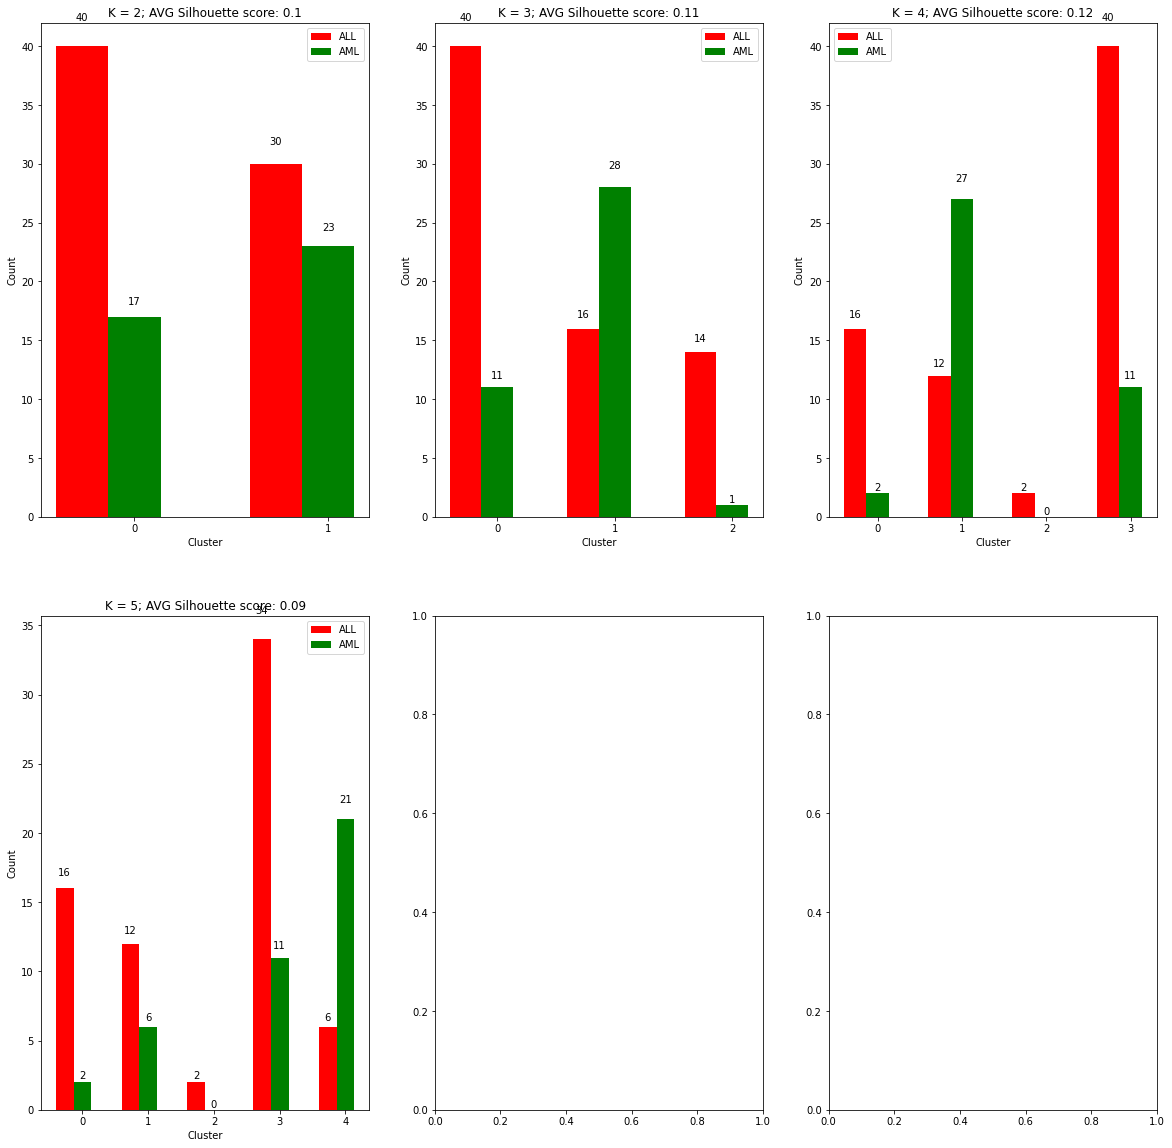

In [91]:
silh_all = plot_results(clusters_test,df_kmeans_results,kmeans_output_vectors)

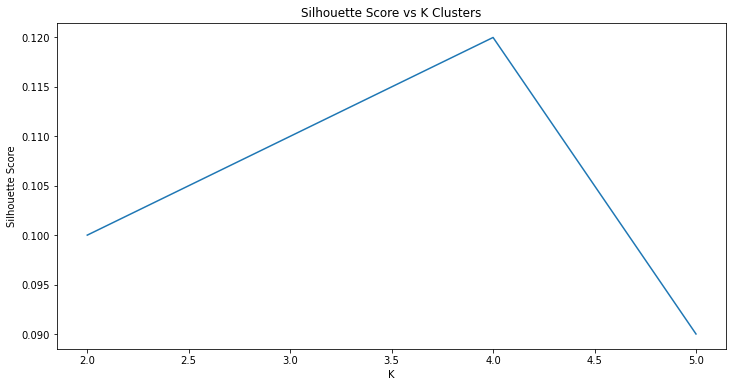

In [92]:
plot_silhouettescore(clusters_test, silh_all)

We can see in the graph above that by applying KMeans to the original data, with k = 2 the results are far from the ideal results, which would be that in each clusters we got just data for one type of diagnosis (ALL or AML). In none of the KMeans results we get closed results if the diagnosis column.

Now lets apply t-SNE in order to visualize the clusters formed by KMeans.

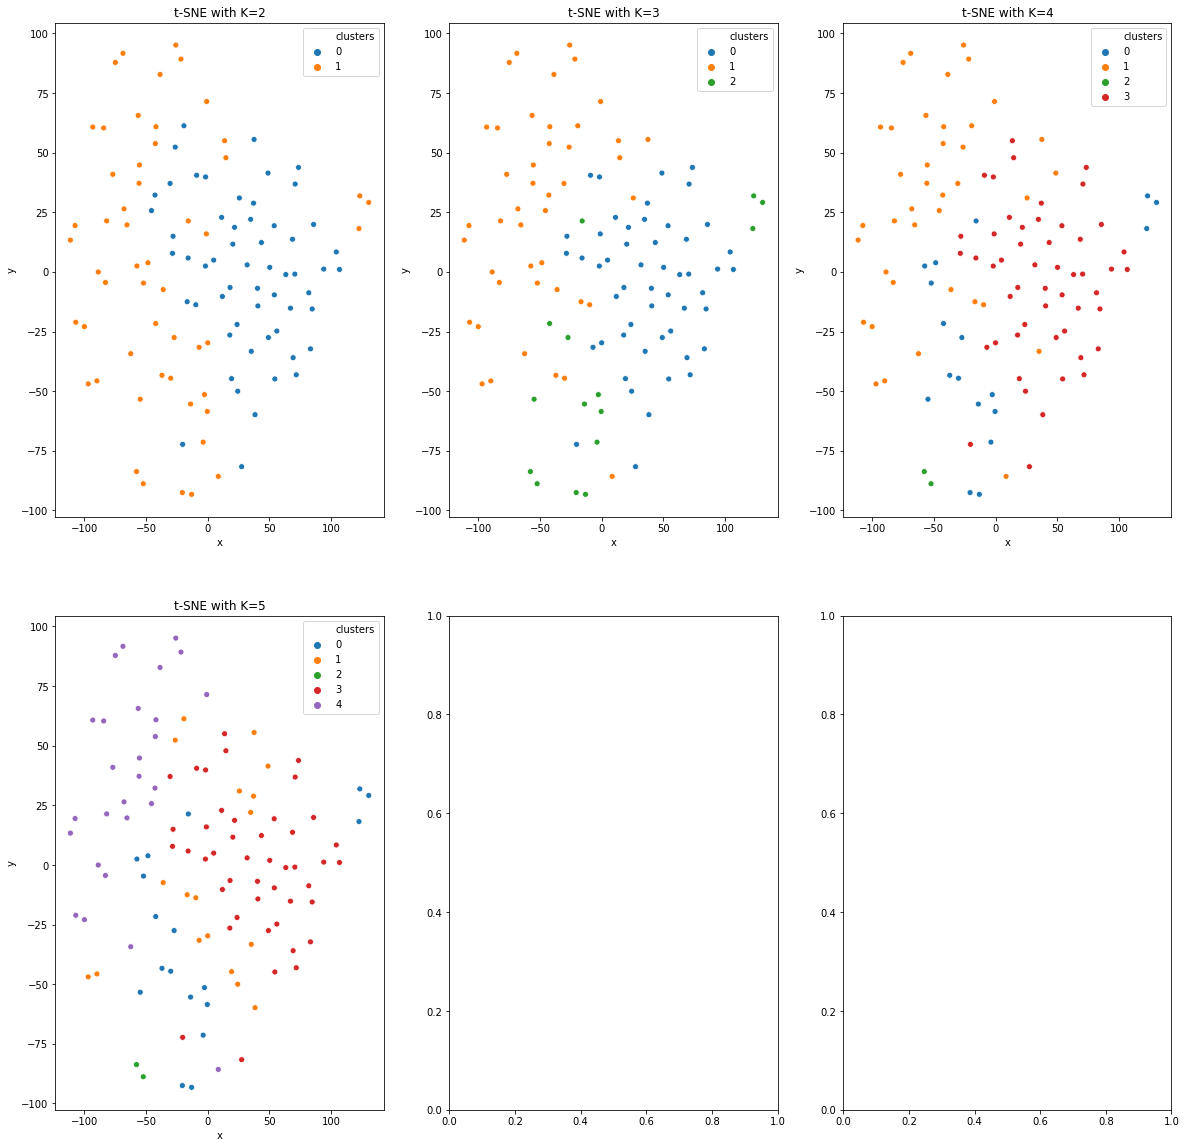

In [93]:
plot_results_tsne(df_plot_tsne,kmeans_output_vectors,clusters_test)

We tested 4 values of K, and for all of them we get average silhouette scores close to zero. This means that clusters are overlapping each others. This can be confirmed when we apply t-NSE visualization and we see that our 110 data points are very closed to each others. 

Probably we will get better results by applying dimensional reduction techniques to our data. This will be done in the next section.

### 3.2 KMeans using only high variance features

In section 2.1 we used a threshold of 1.25 in the 'VarianceThreshold' sklearn class. With that we obtained 31 features, which are the 31 features with the highest variance.

In [94]:
X_variance.shape

(110, 31)

Now lets apply KMeans to this data, and test the same k values that we tested in the previuos section

In [95]:
clusters_test = [2,3,4,5]
df_kmeans_var_results , kmeans_var_output_vectors = kmeans_clustering(pd.DataFrame(X_variance), clusters_test)

Now lets plot the KMeans clusters, grouped by diagnosis.

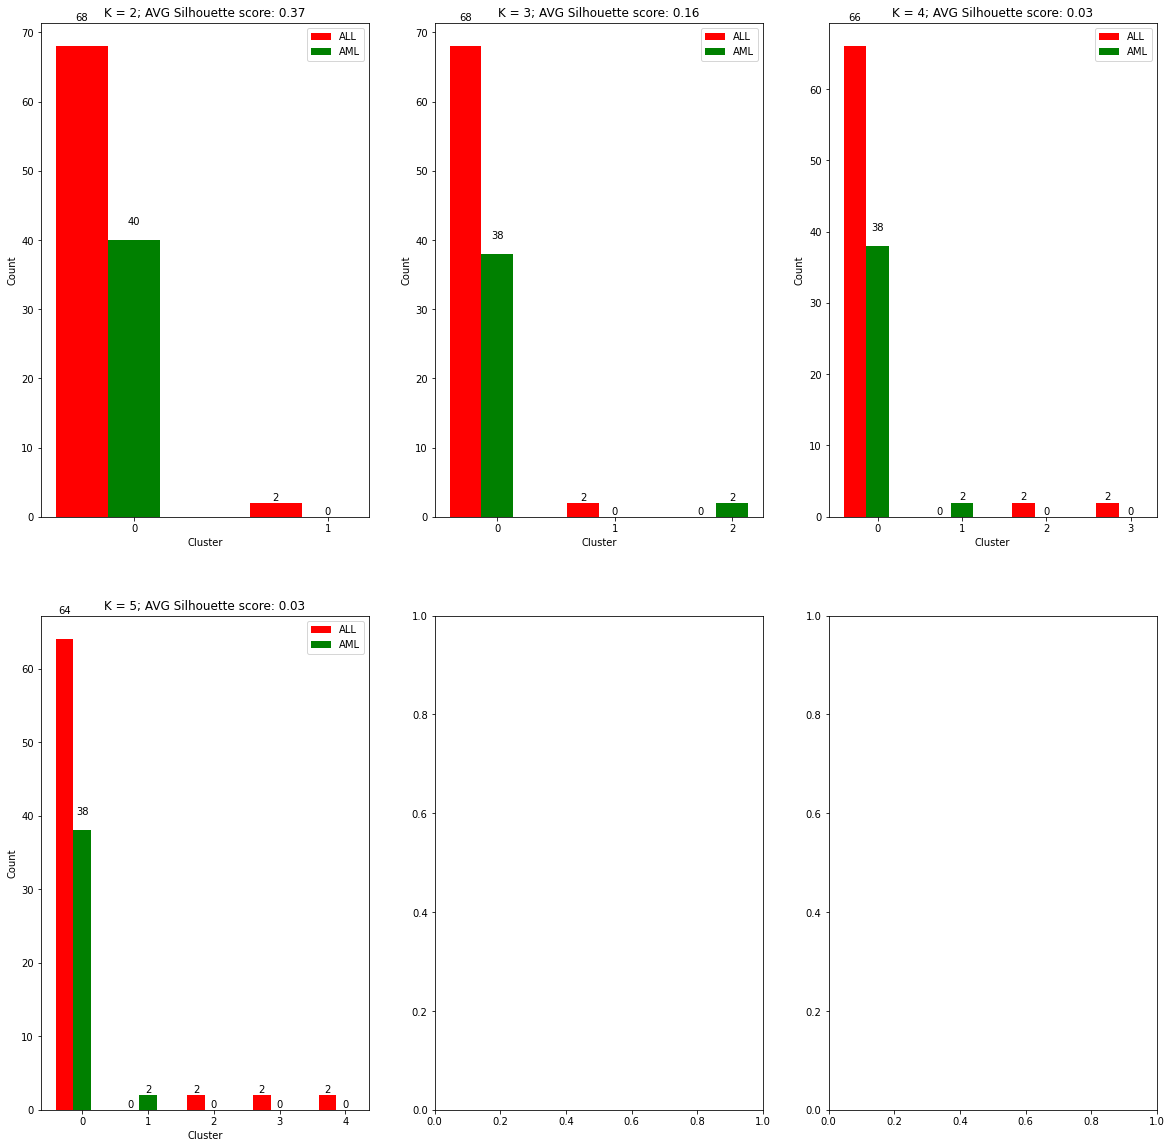

In [96]:
silh_all = plot_results(clusters_test,df_kmeans_var_results,kmeans_var_output_vectors)

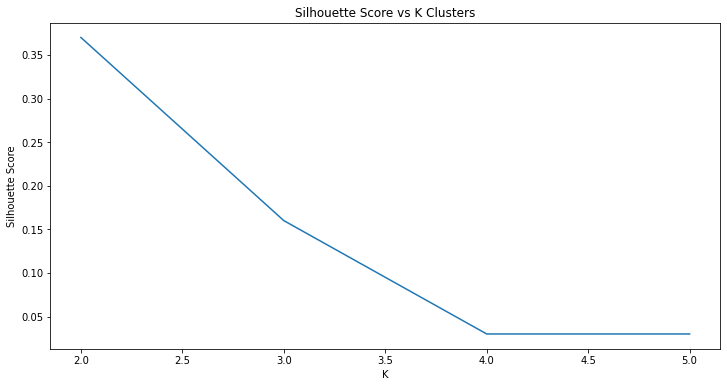

In [97]:
plot_silhouettescore(clusters_test, silh_all)

We get very strange results, by reducing the features by the variance threshold. For all K values tested we got a bigger cluster with mostly all the data, and smaller clusters with very few data points.

Otherwise, with this dimensional reduction technique we got the 0.37 silhouette score when K = 2, which is the highest we got until now.

Now lets plot the KMeans results using t-SNE visualization methods.

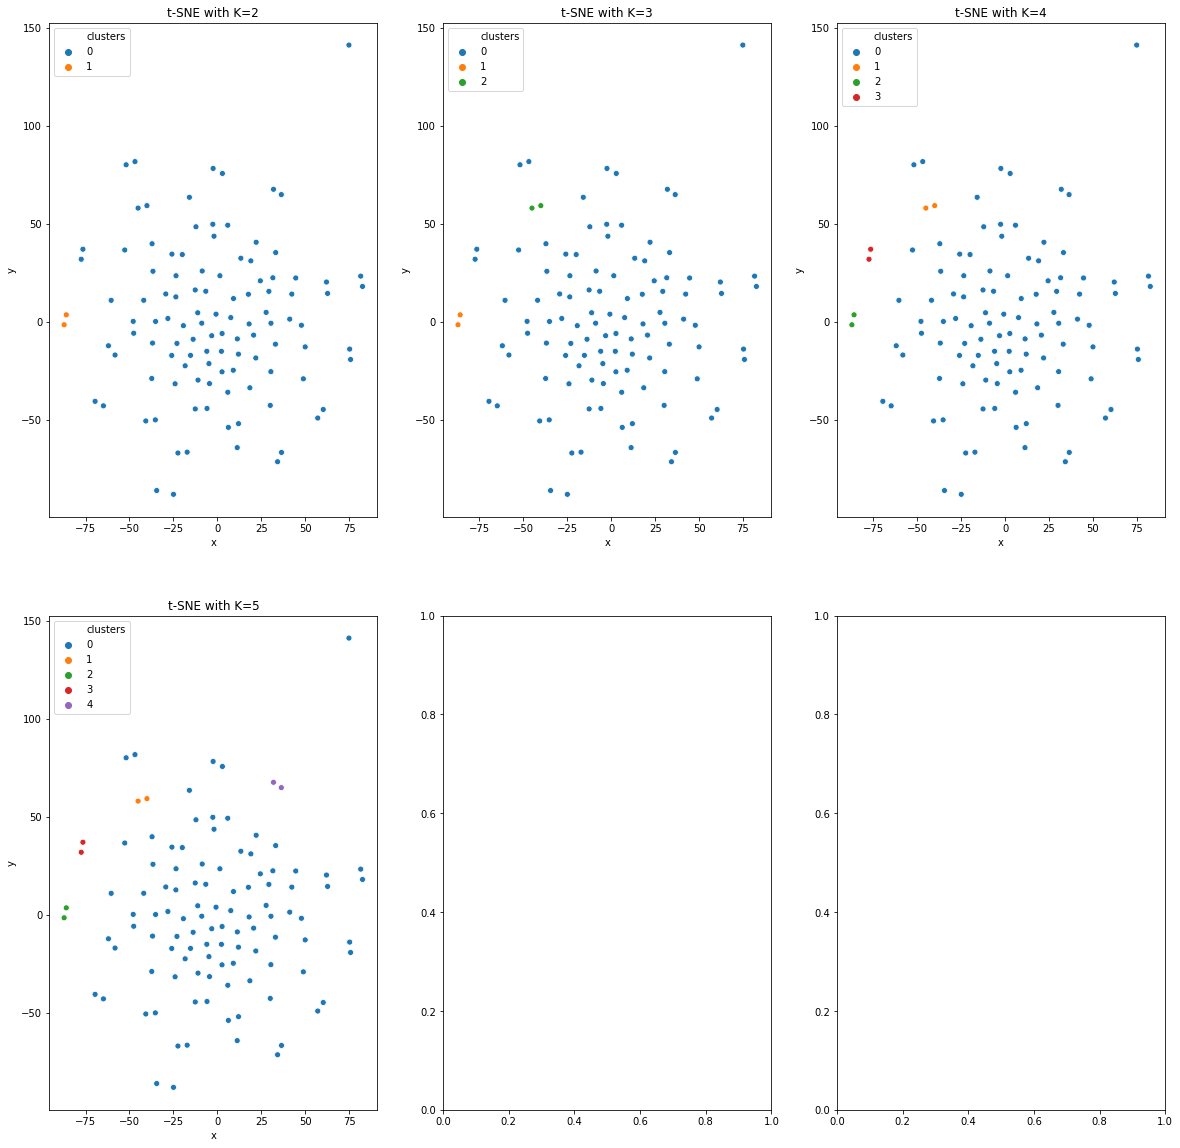

In [99]:
df_plot_var_xvar_tsne = pd.DataFrame(TSNE(n_components=2).fit_transform(X_variance),columns=['x','y'])
plot_results_tsne(df_plot_var_xvar_tsne,kmeans_var_output_vectors,clusters_test)

By analysing the graphs above we can observe that almost all points are kept in just one cluster. We are not getting quality results when using this dimensional reduction technique.

### 3.3 KMeans using PCA Components

In section 2.2 we choose to retain 30 components. Lets test the KMeans clustering algorithm, with different values of K, in this data.

In [100]:
clusters_test = [2,3,4,5,6,7,8,9,10]
df_kmeans_pca_results , kmeans_pca_output_vectors = kmeans_clustering(pd.DataFrame(X_PCA), clusters_test)

Plot the results by diagnosis.

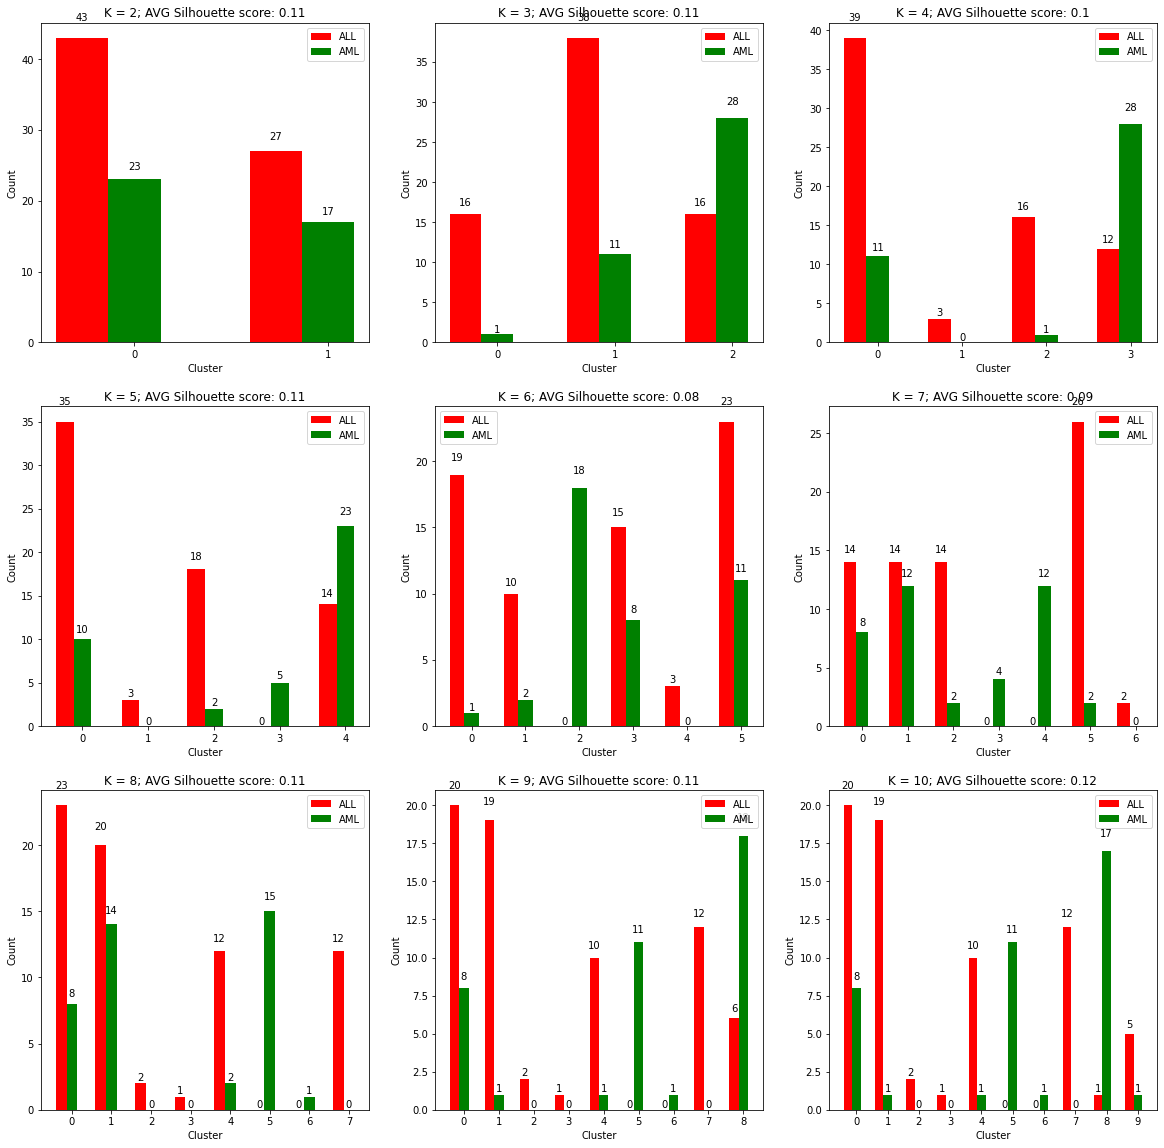

In [101]:
silh_all = plot_results(clusters_test,df_kmeans_pca_results,kmeans_pca_output_vectors)

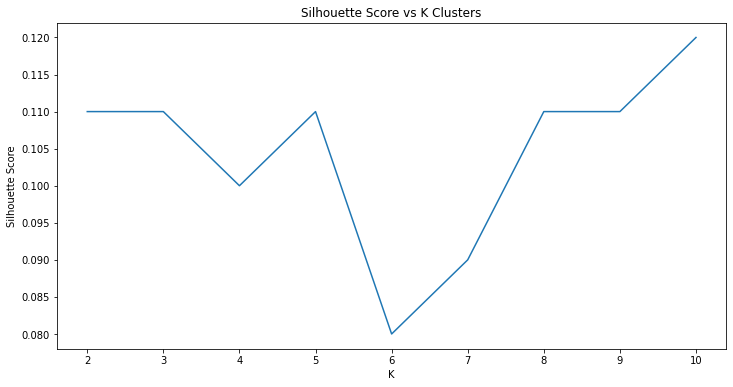

In [102]:
plot_silhouettescore(clusters_test, silh_all)

None of the K values we tested grouped the data in a similar way of the diagnosis feature. By applying KMeans after PCA we got small values of the silhouette score, with the highest obtained around 0.12 when k = 3.

Now lets visualize the clusters formed using t-SNE.

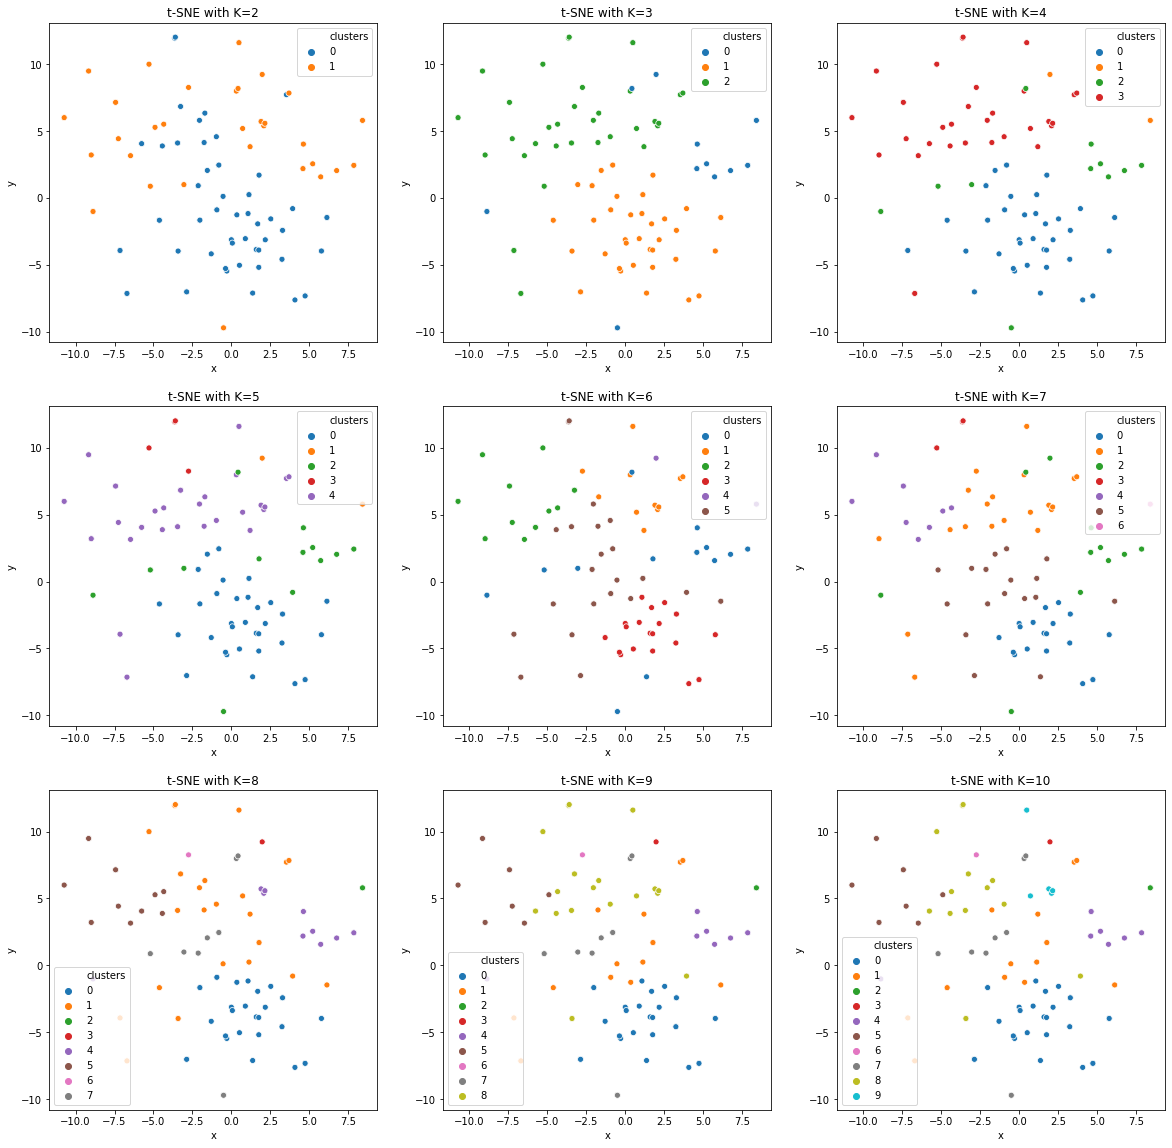

In [103]:
df_plot_pca_xpca_tsne = pd.DataFrame(TSNE(n_components=2).fit_transform(X_PCA),columns=['x','y'])
plot_results_tsne(df_plot_pca_xpca_tsne,kmeans_pca_output_vectors,clusters_test)

Despite the clusters formed are far from the diagnosis, we can see that we obtained more quality clusters when using PCA compared to the strategie of removing low variance features, because we are not obtaining one big cluster with almost all the data points.

## 4. Clustering Patients using Hierarchical Clustering

Use a **Hierarchical Clustering Algorithm (HCA)** to cluster the patients: 

* Cluster the data in **X_variance**.
    * Use **different linkage metrics**.
    * Use different values of `K`.
    * For each linkage metric and value of `K` present the clustering by specifying how many patients ALL and AML are in each cluster as you did before. 
    * What is the best linkage metric and the best value of `K`? Justify using the clustering results and the [Silhouette score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

* Cluster the data in **X_PCA**.
    * Study different linkage metrics and different values of `K` as above.

* Compare the results obtained in the two datasets above for the best linkage metric and the best `K`. Discuss.

In [104]:
def hca_clustering(data, clusters_test, linkage):
    results_all = []
    indexes = []
    hca_output_vectors = []
    for i, c in enumerate(clusters_test):
        data2 = data.copy()
        indexes.append(c)
        kmeans = AgglomerativeClustering(n_clusters=c, linkage = linkage).fit(data2)
        data2['cluster'] = kmeans.labels_
        data2['target'] = y
        hca_output_vectors.append({'k':c, 'clusters': data2['cluster']})
        clusters_uniques = np.unique(data2['cluster'])
        results = {}
        for c2 in clusters_uniques:
            all_len = len(data2[(data2['cluster']==c2)&(data2['target']=='ALL')])
            aml_len = len(data2[(data2['cluster']==c2)&(data2['target']=='AML')])
            results[c2] = {'ALL':all_len, 'AML':aml_len}
        results_all.append(results)
    return pd.DataFrame(results_all, index = indexes), hca_output_vectors


### 4.1 HCA using X_variance

In [105]:
clusters_test = [2,3,4,5]
df_hca_results , hca_output_vectors = hca_clustering(pd.DataFrame(X_variance), clusters_test, 'single')

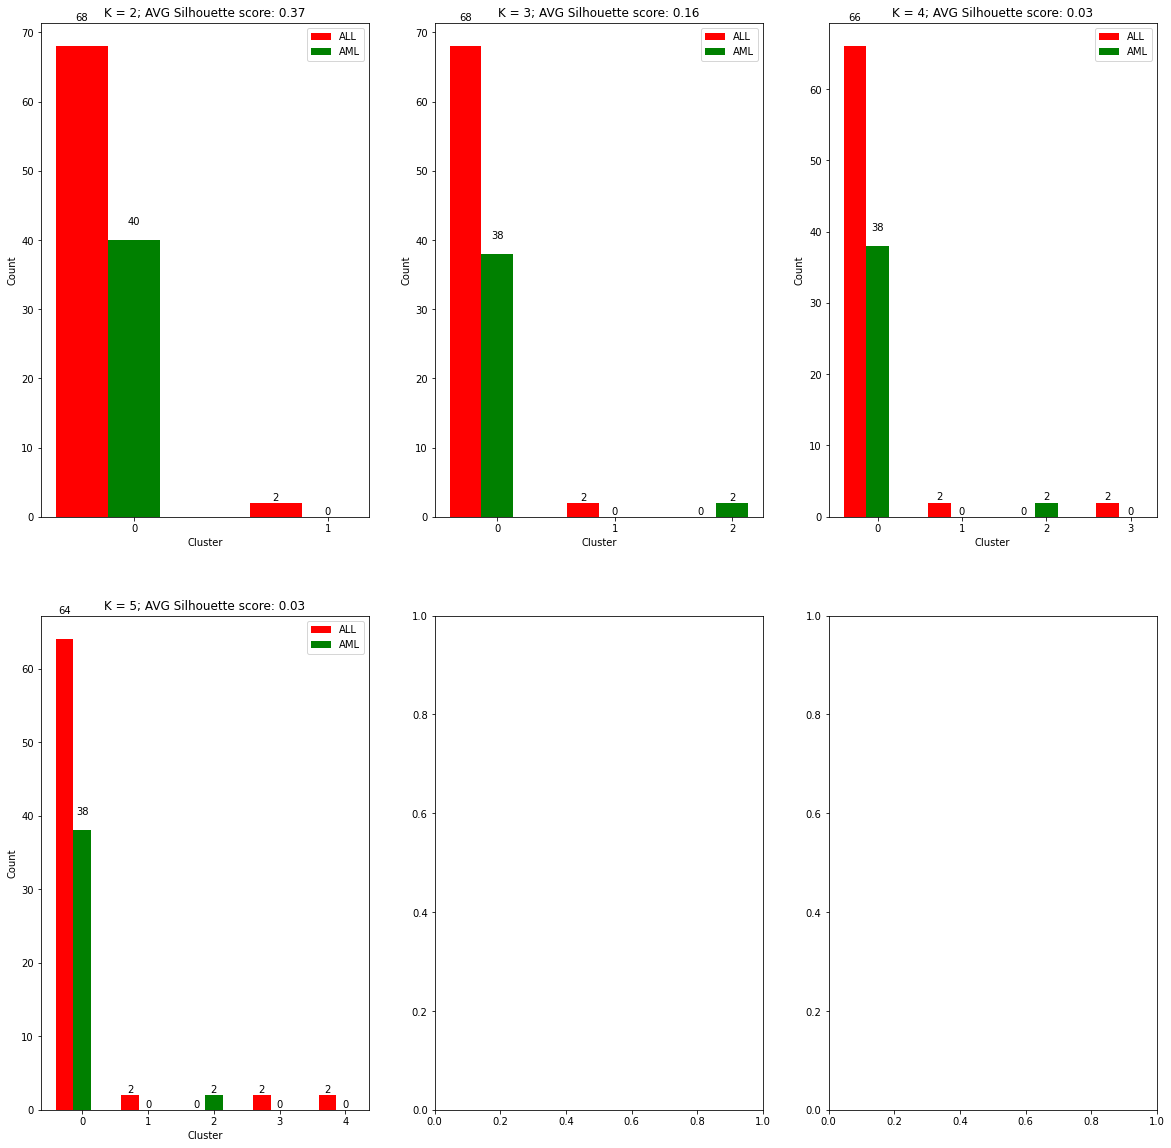

In [106]:
silh_all = plot_results(clusters_test,df_hca_results,hca_output_vectors)

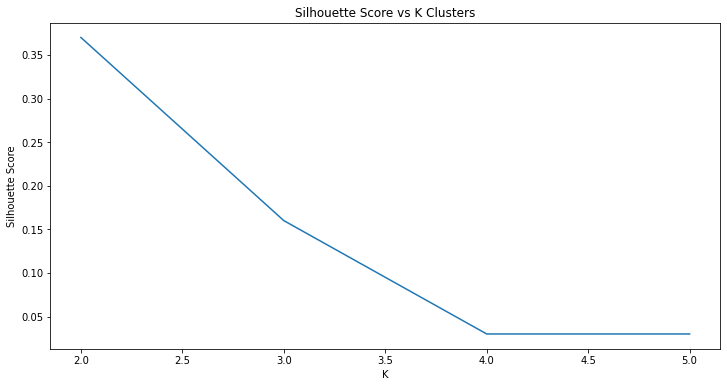

In [107]:
plot_silhouettescore(clusters_test, silh_all)

In this case we had similar results to the ones achieved by KMeans using the features with highest variance

Starting analysis with linkage ward:




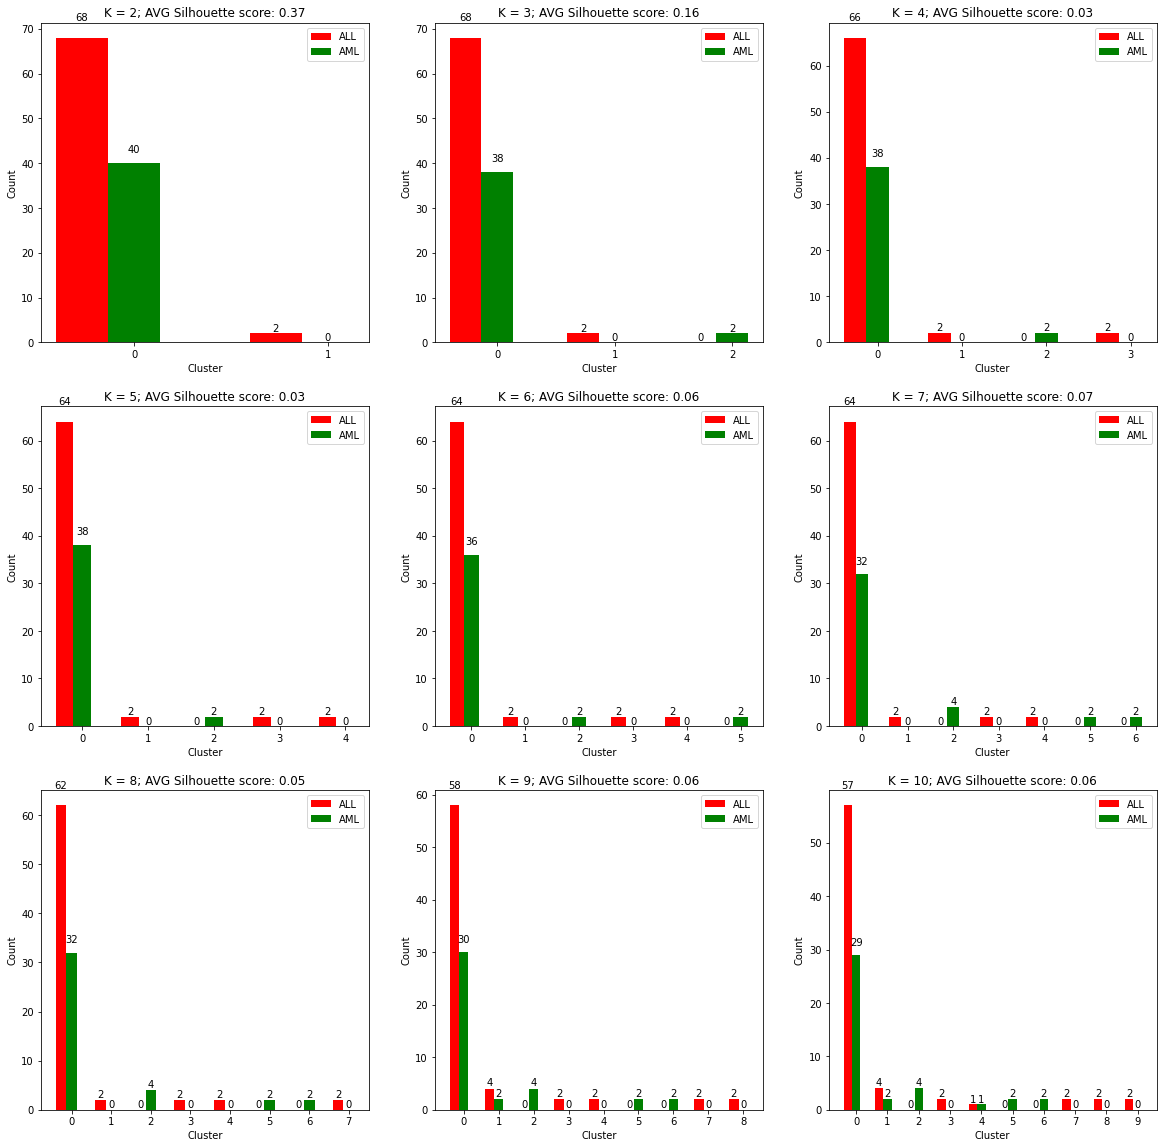

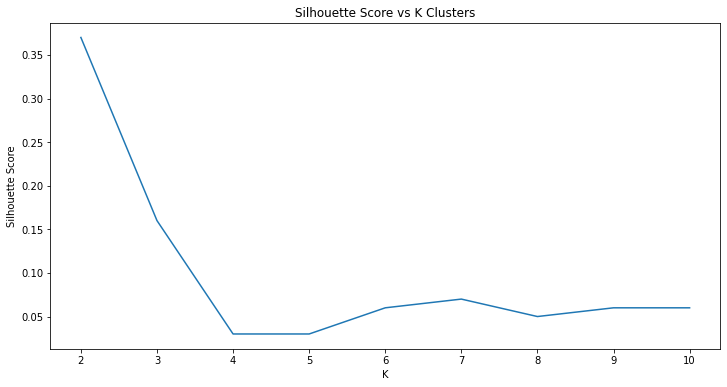

Starting analysis with linkage complete:




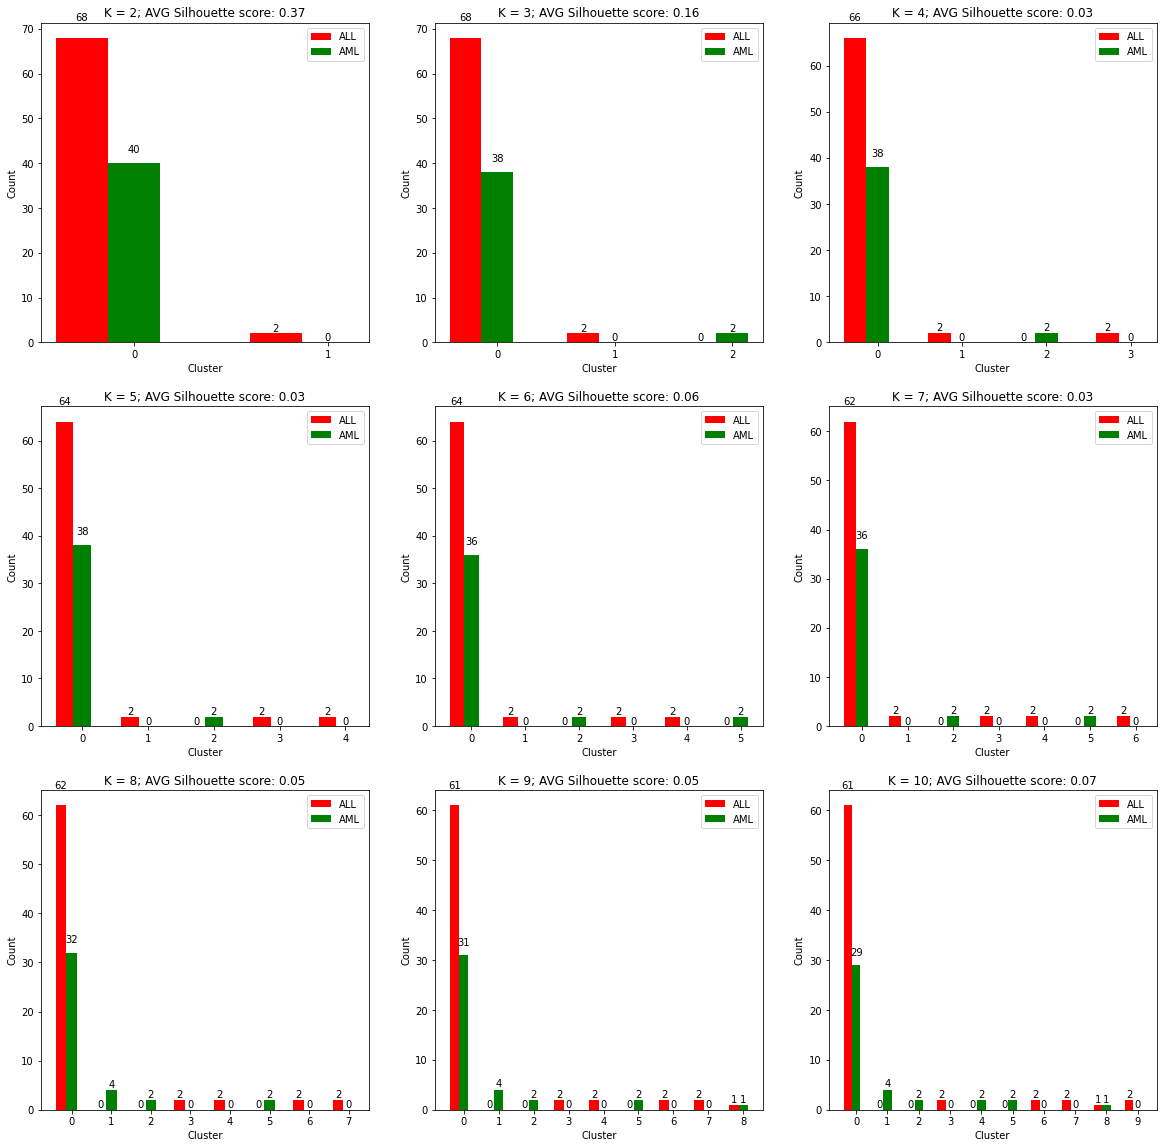

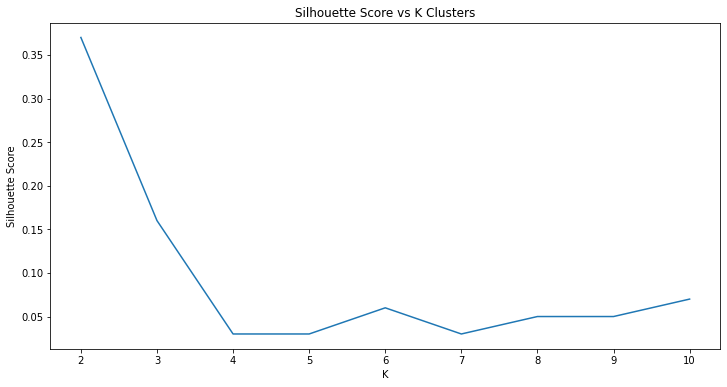

Starting analysis with linkage average:




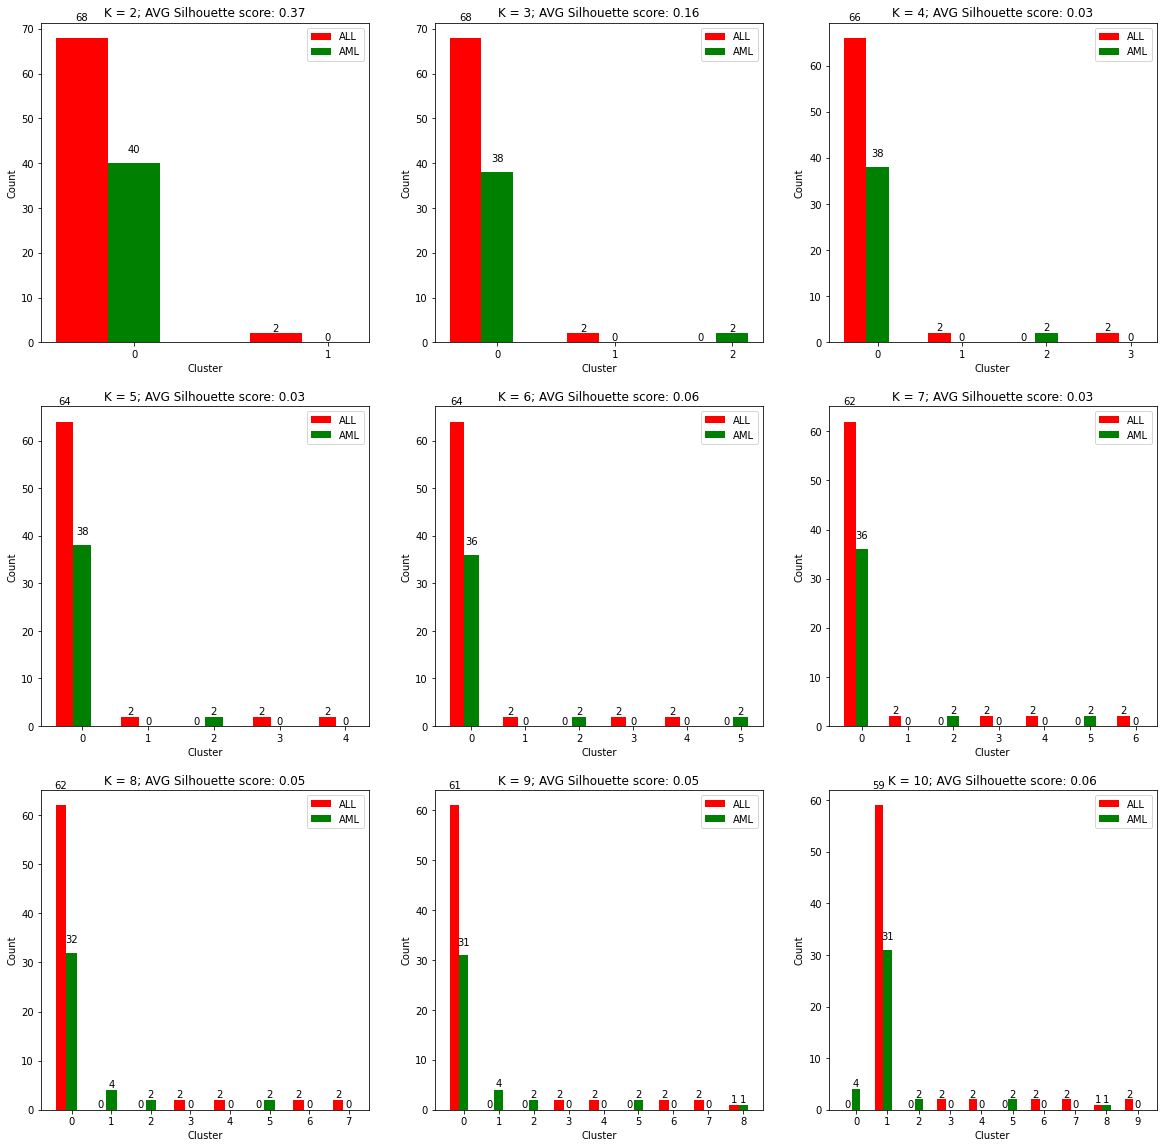

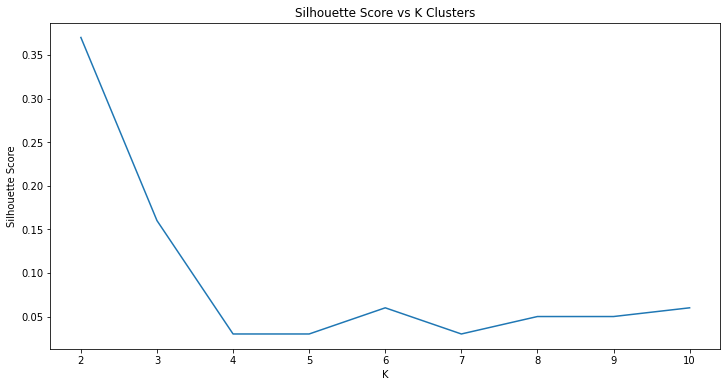

Starting analysis with linkage single:




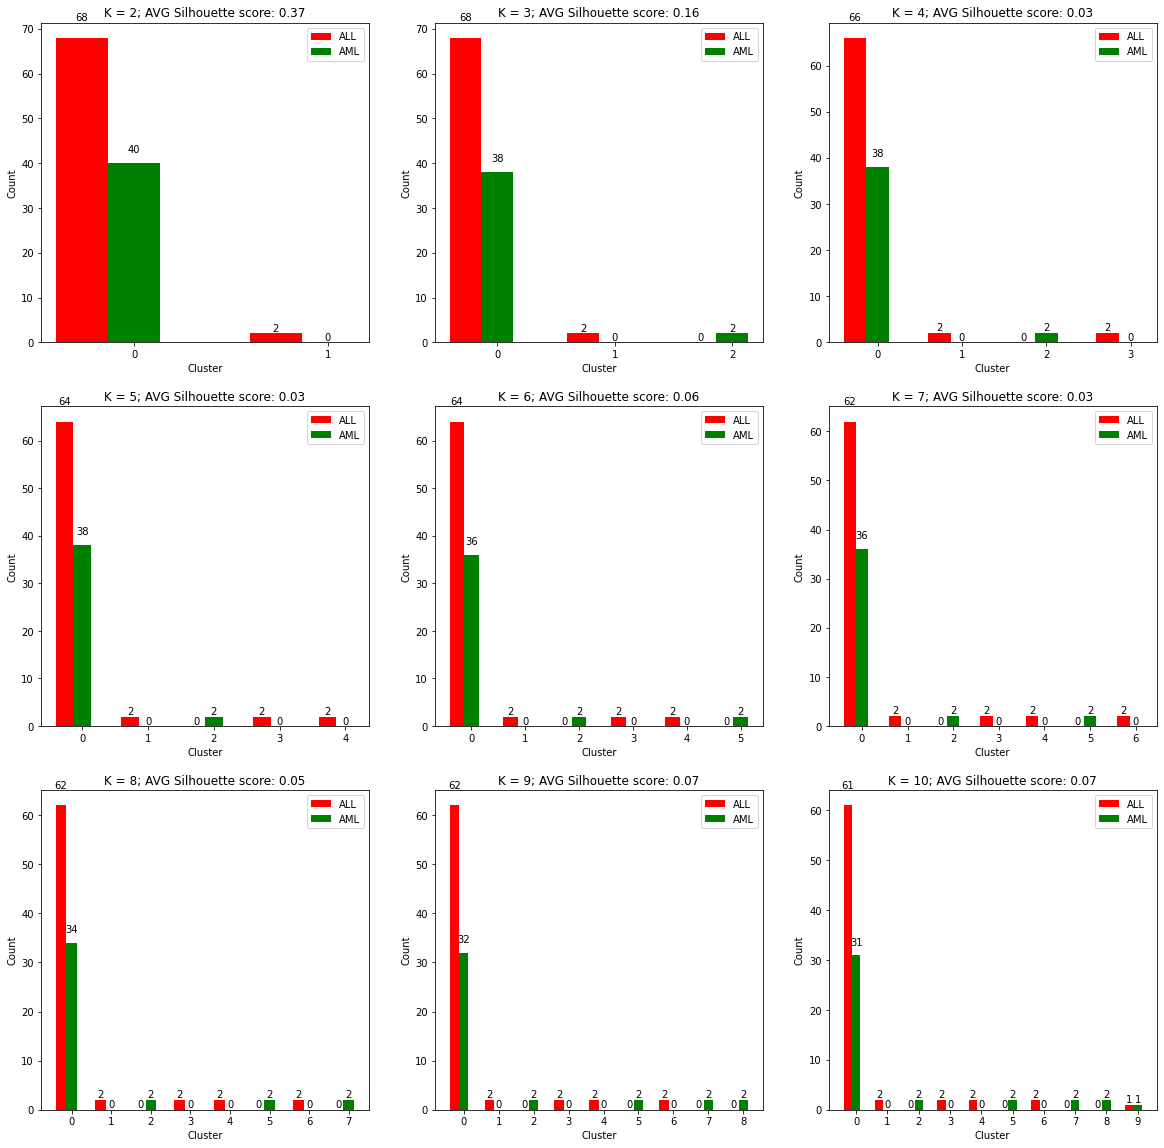

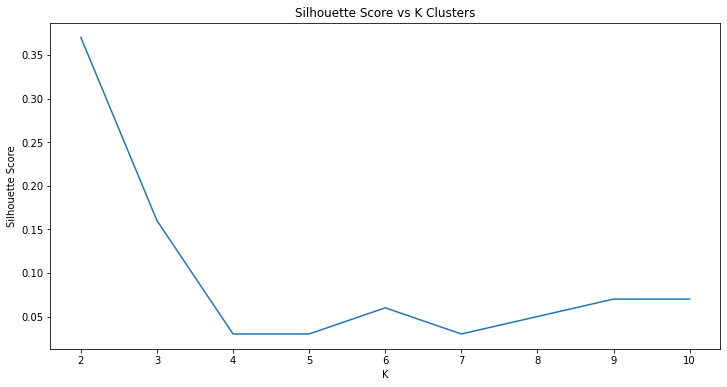

In [108]:
linkages = ["ward", "complete", "average", 'single']
all_hcavar_results = {}
for linkage in linkages:
    print(f"==============================================\nStarting analysis with linkage {linkage}:\n\n")
    clusters_test = [2,3,4,5,6,7,8,9,10]
    df_hca_results , hca_output_vectors = hca_clustering(pd.DataFrame(X_variance), clusters_test, linkage)
    all_hcavar_results[linkage] = df_hca_results , hca_output_vectors
    silh_all = plot_results(clusters_test,df_hca_results,hca_output_vectors)
    plt.show()
    plot_silhouettescore(clusters_test, silh_all)
    plt.show()

The results are very similar with a **K=2** having the highest silhouette score for all.

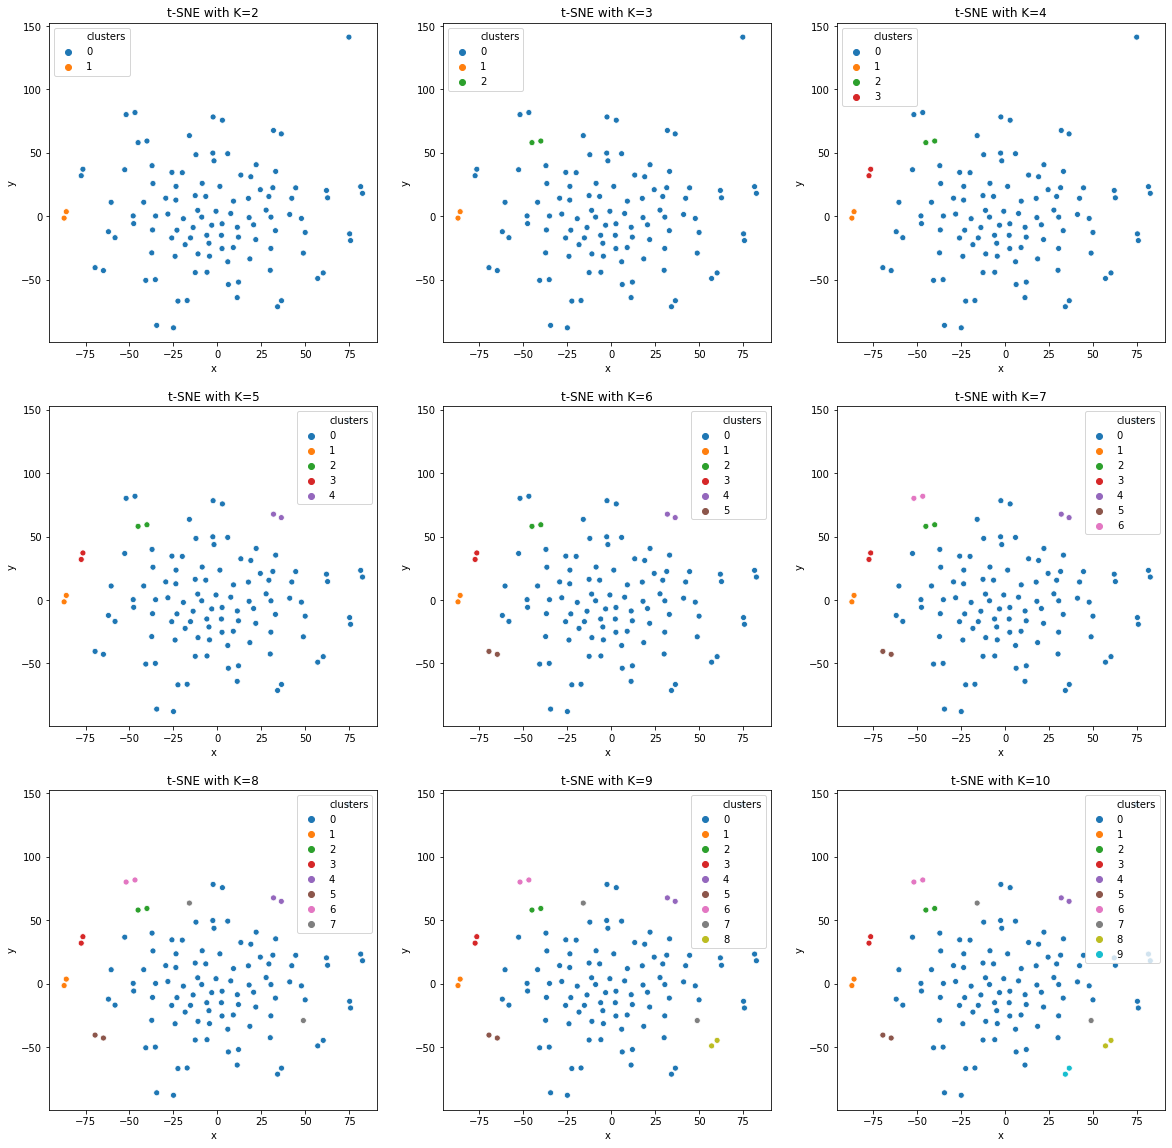

In [109]:
plot_results_tsne(df_plot_var_xvar_tsne,all_hcavar_results['single'][1],clusters_test)

### 4.2 KMeans using PCA Components

Same as before, in section 2.2 we choose to retain 30 components. Here we now test the HCA clustering algorithm, with different values of K, in this data.

In [110]:
clusters_test = [2,3,4,5,6,7,8,9,10]
df_hca_pca_results , hca_pca_output_vectors = hca_clustering(pd.DataFrame(X_PCA), clusters_test, 'single')

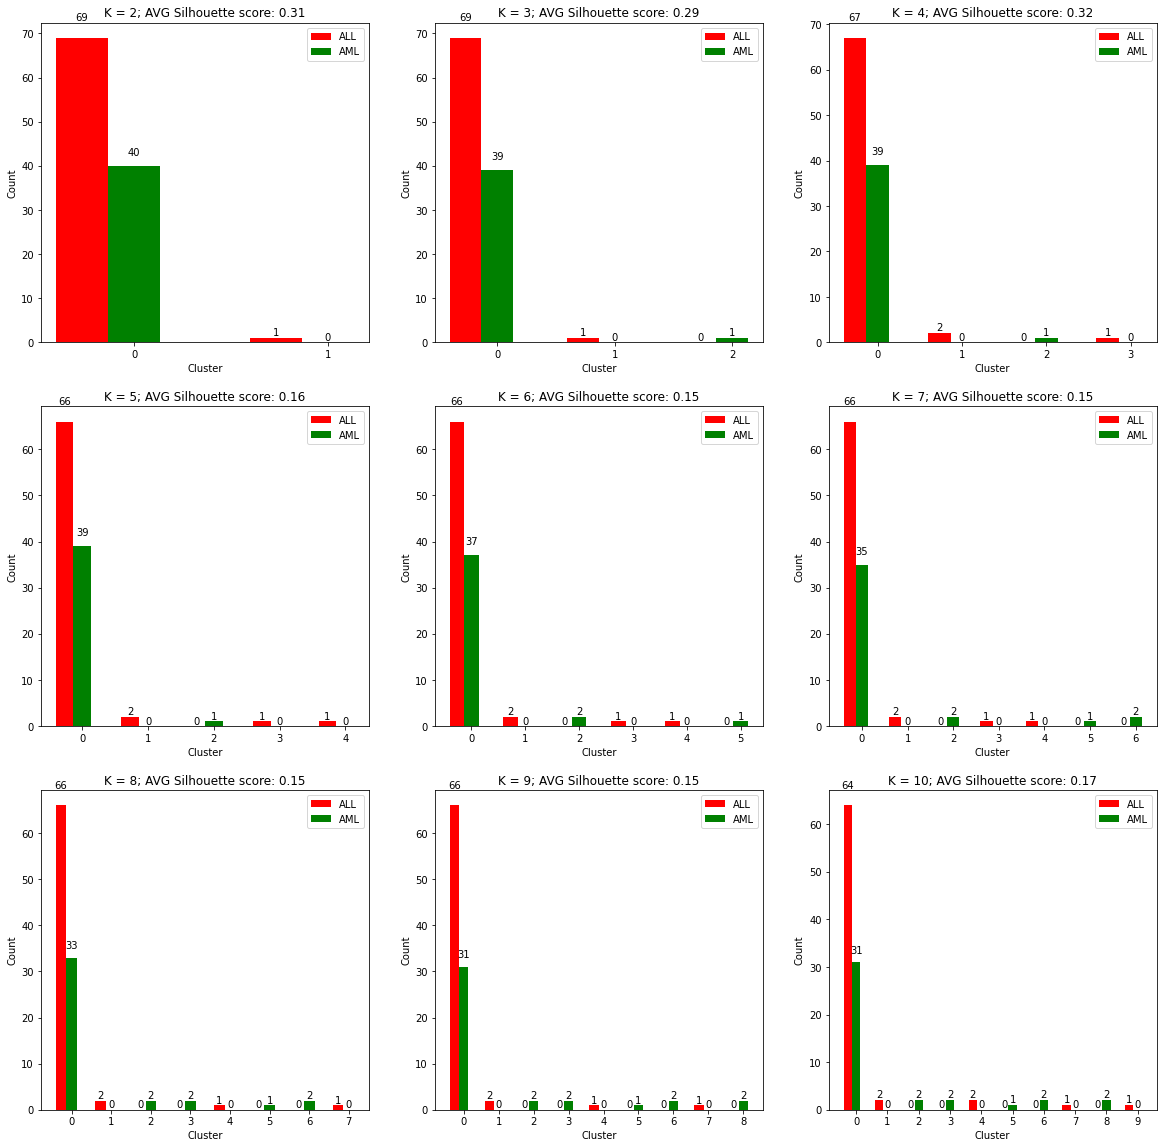

In [111]:
silh_all = plot_results(clusters_test,df_hca_pca_results,hca_pca_output_vectors)

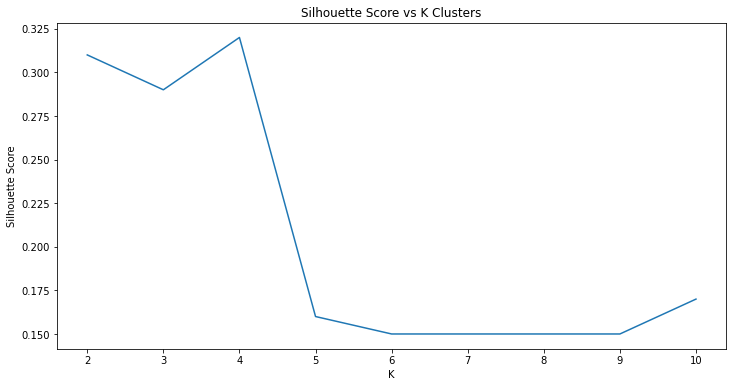

In [112]:
plot_silhouettescore(clusters_test, silh_all)

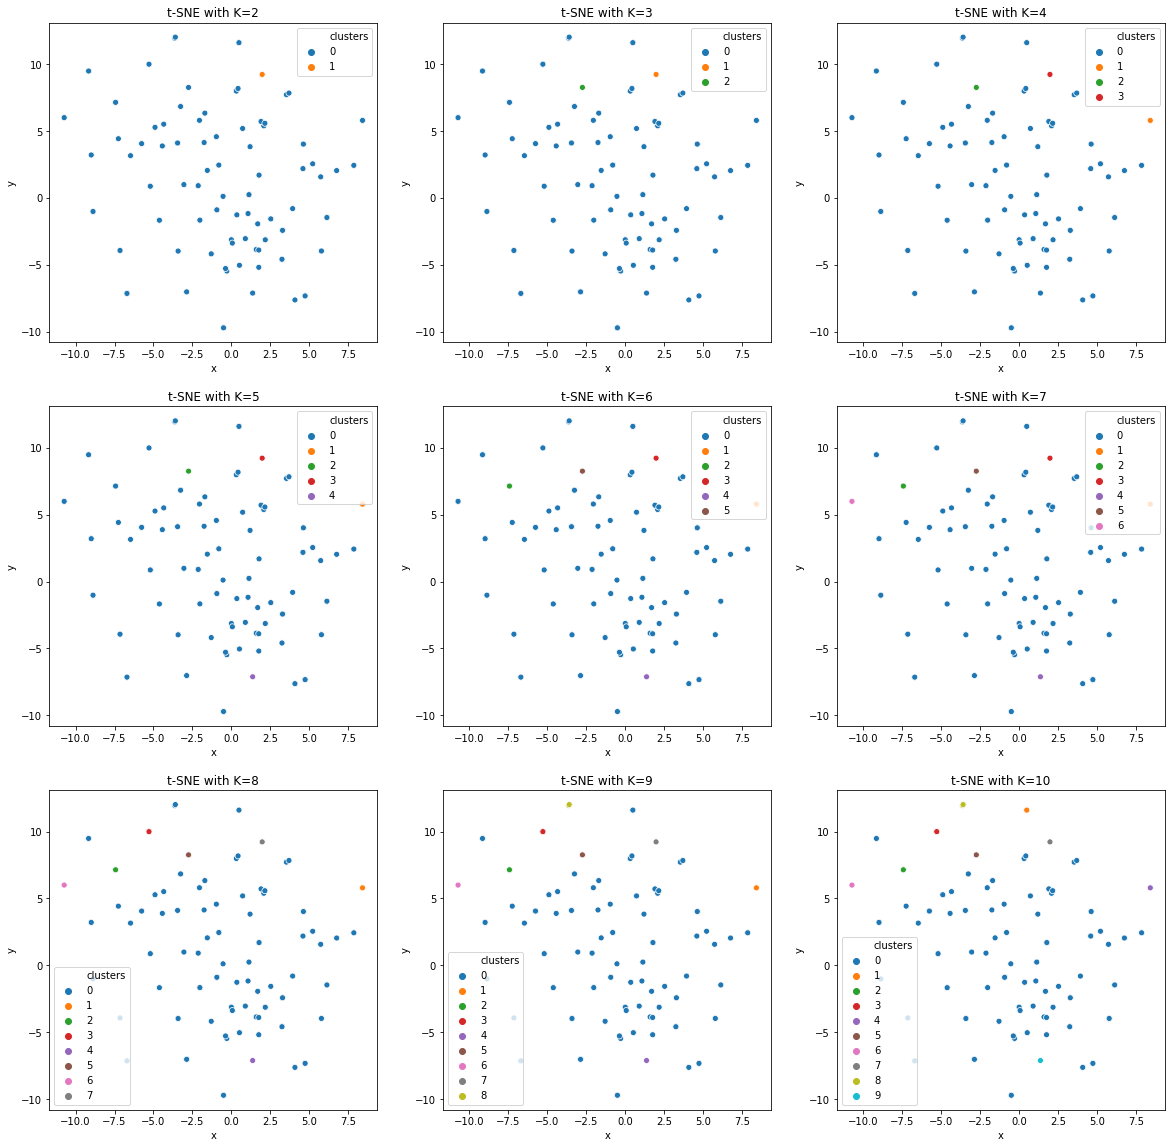

In [113]:
plot_results_tsne(df_plot_pca_xpca_tsne,hca_pca_output_vectors,clusters_test)

Starting analysis with linkage ward:




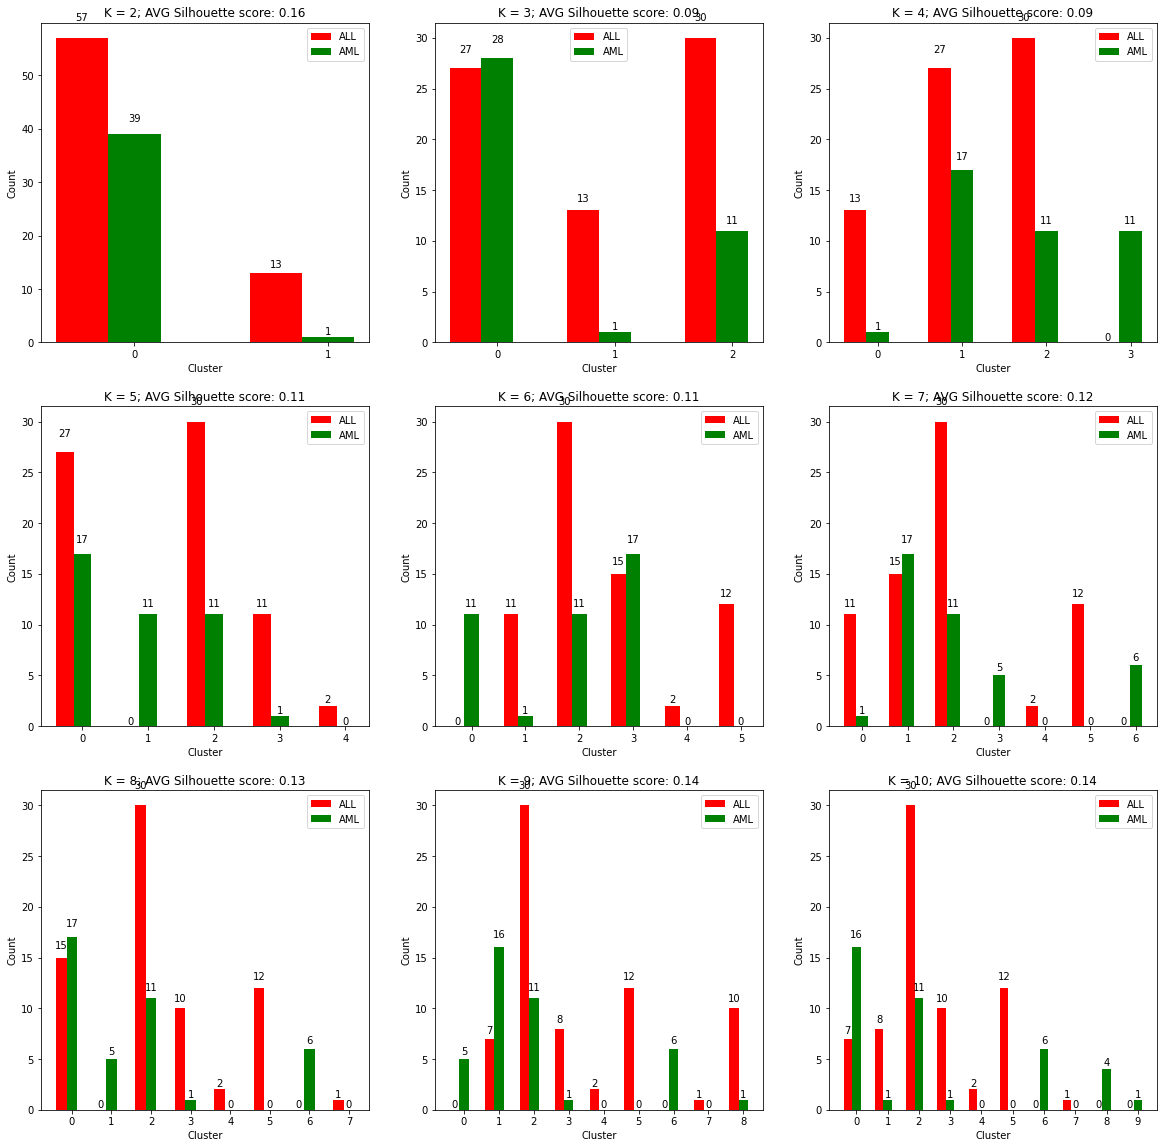

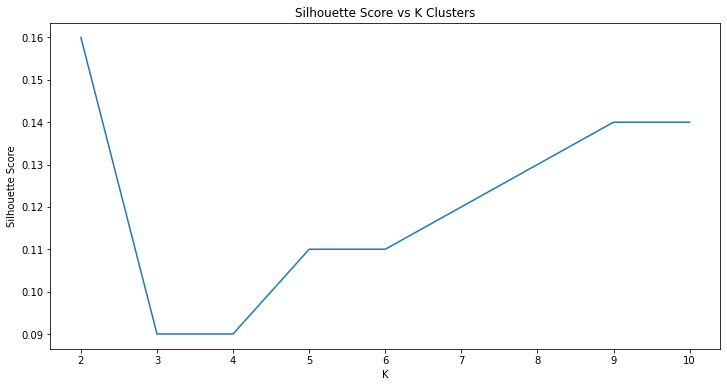

Starting analysis with linkage complete:




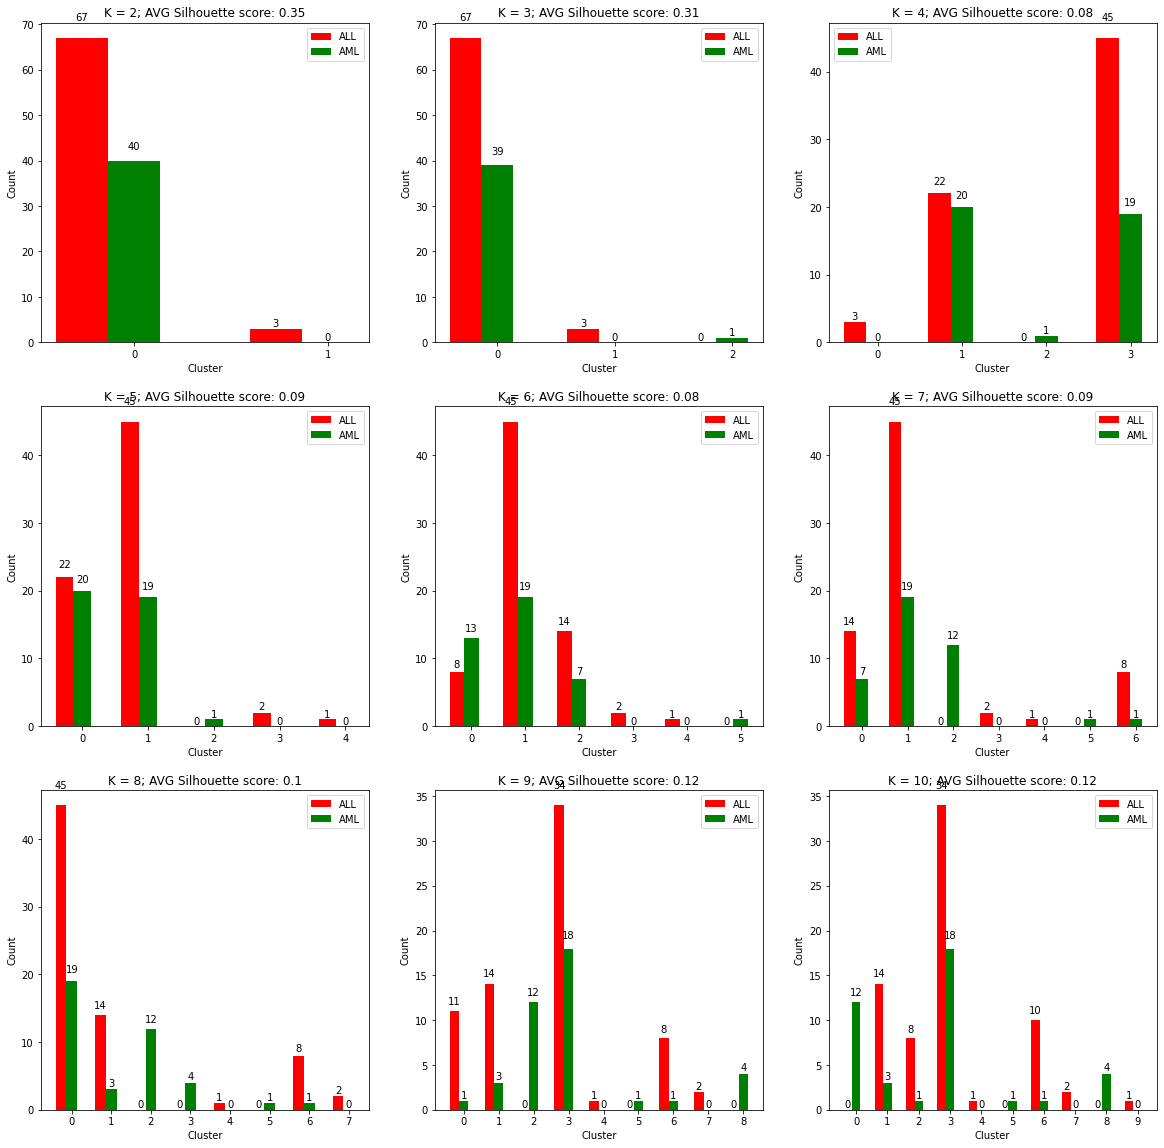

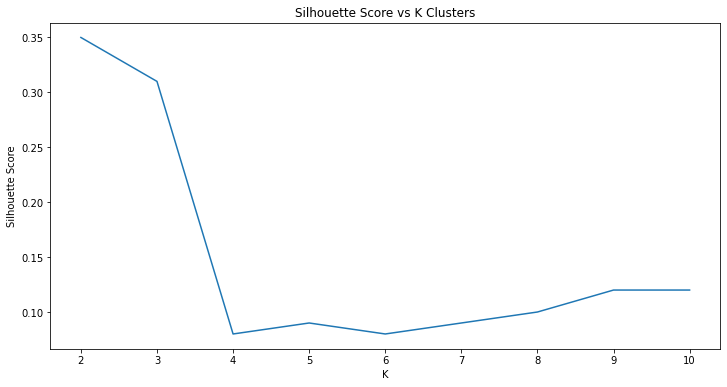

Starting analysis with linkage average:




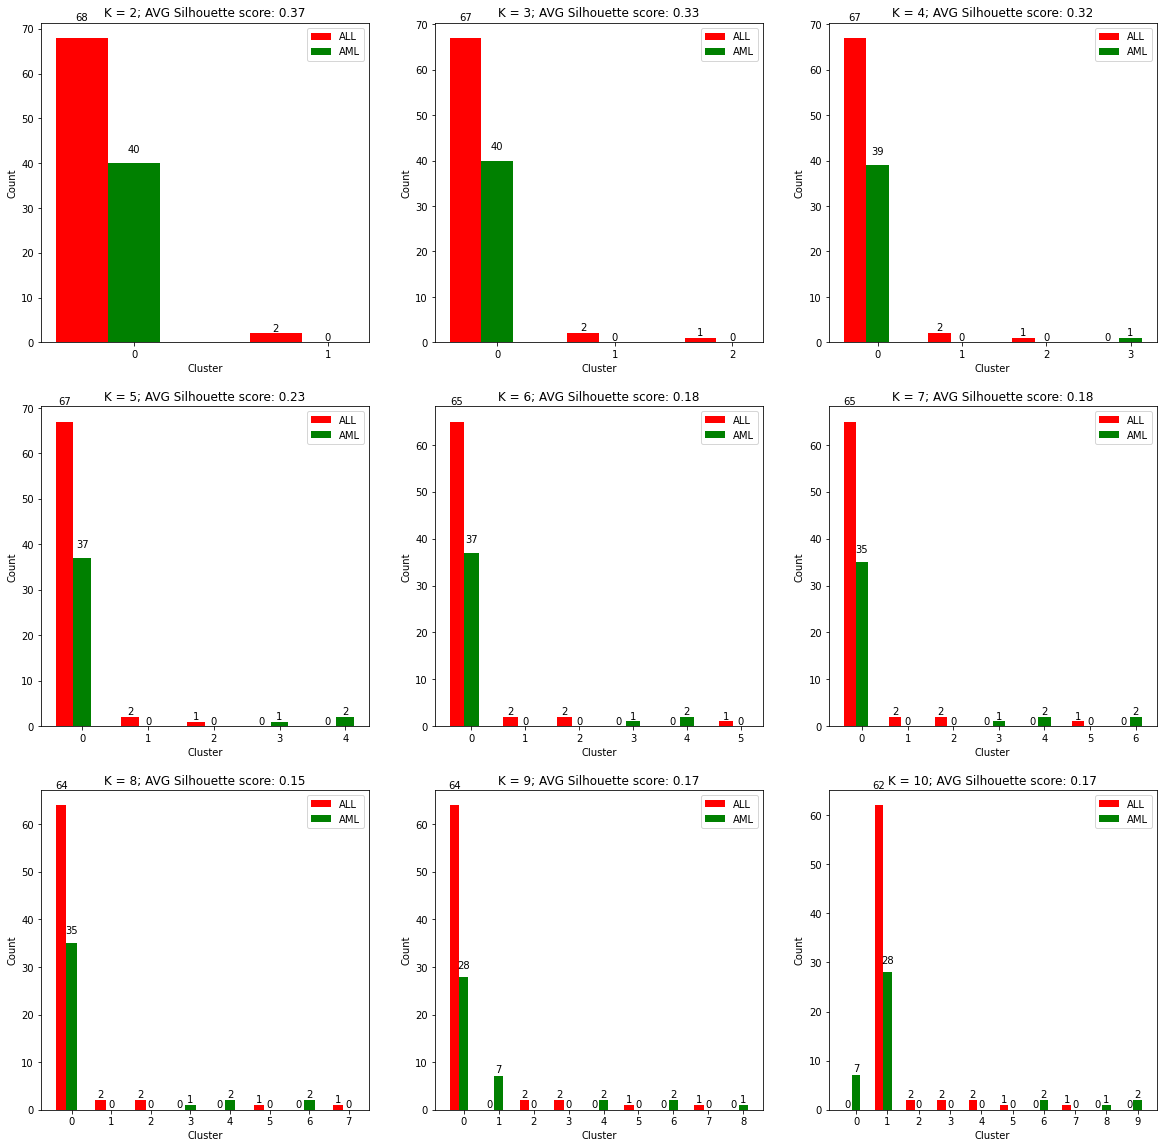

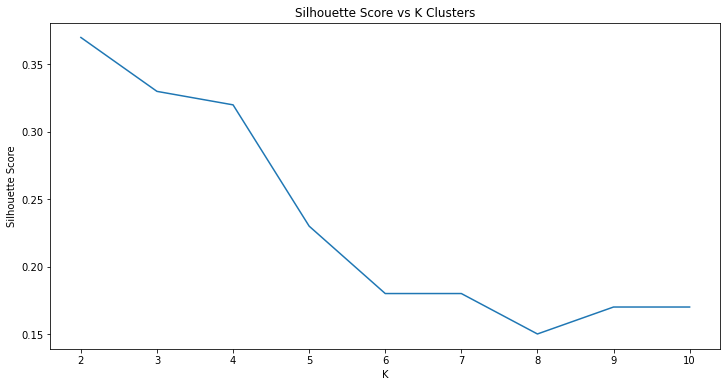

Starting analysis with linkage single:




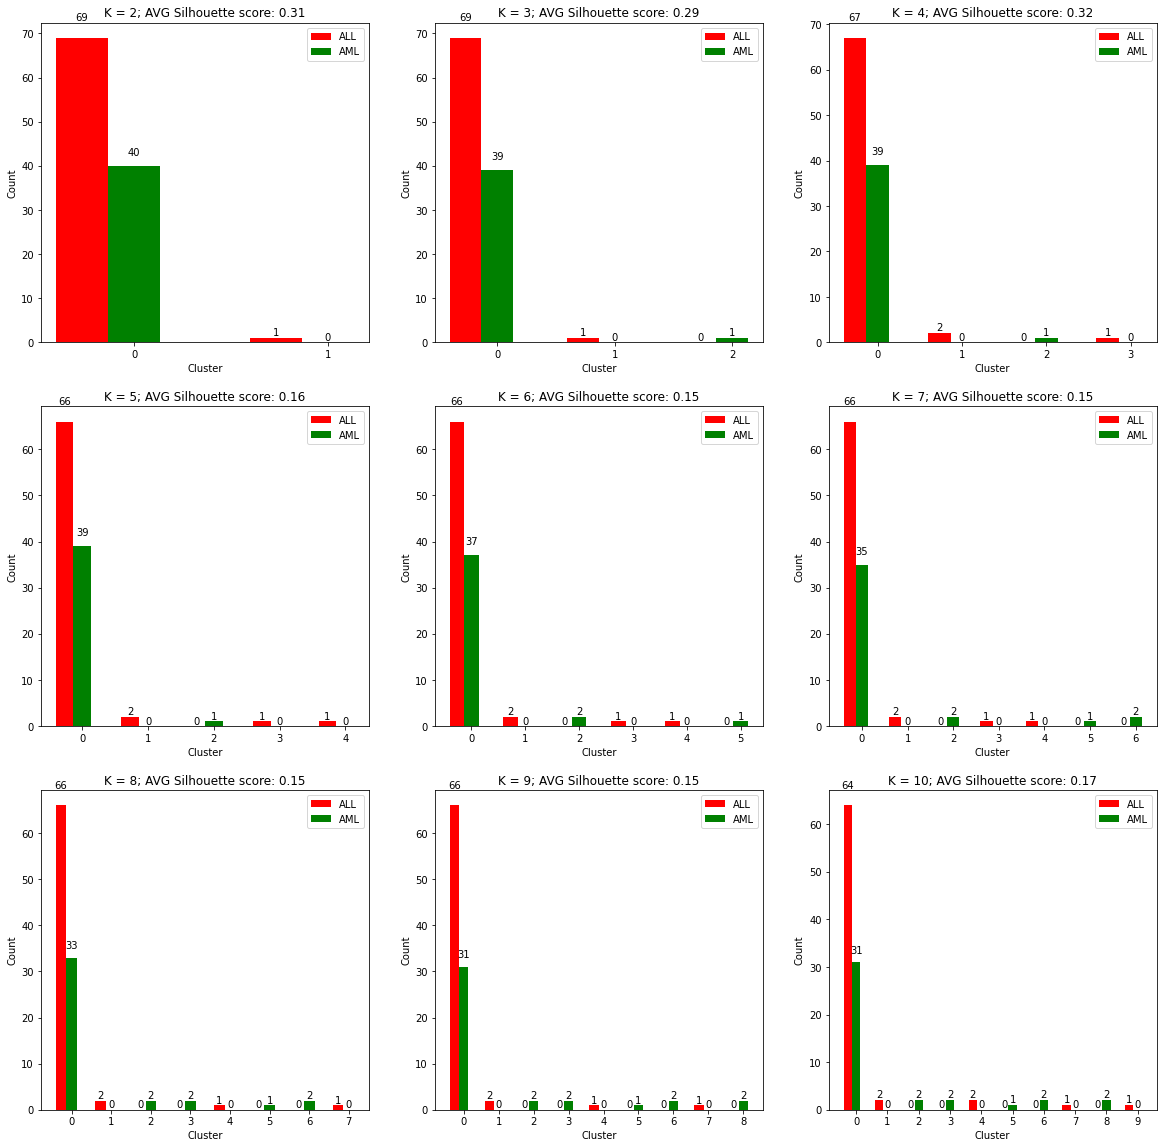

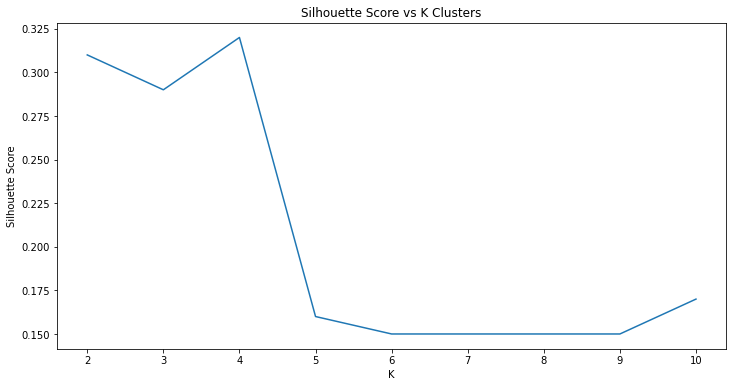

In [78]:
linkages = ["ward", "complete", "average","single"]
all_hcapca_results = {}
for linkage in linkages:
    print(f"==============================================\nStarting analysis with linkage {linkage}:\n\n")
    clusters_test = [2,3,4,5,6,7,8,9,10]
    df_hca_pca_results , hca_pca_output_vectors = hca_clustering(pd.DataFrame(X_PCA), clusters_test, linkage)
    all_hcapca_results[linkage] = df_hca_pca_results , hca_pca_output_vectors
    silh_all = plot_results(clusters_test,df_hca_pca_results,hca_pca_output_vectors)
    plt.show()
    plot_silhouettescore(clusters_test, silh_all)
    plt.show()

Using the PCA resulting components, we have the highest silhouette obtained by the linkage metric **average** and a **k=2**.

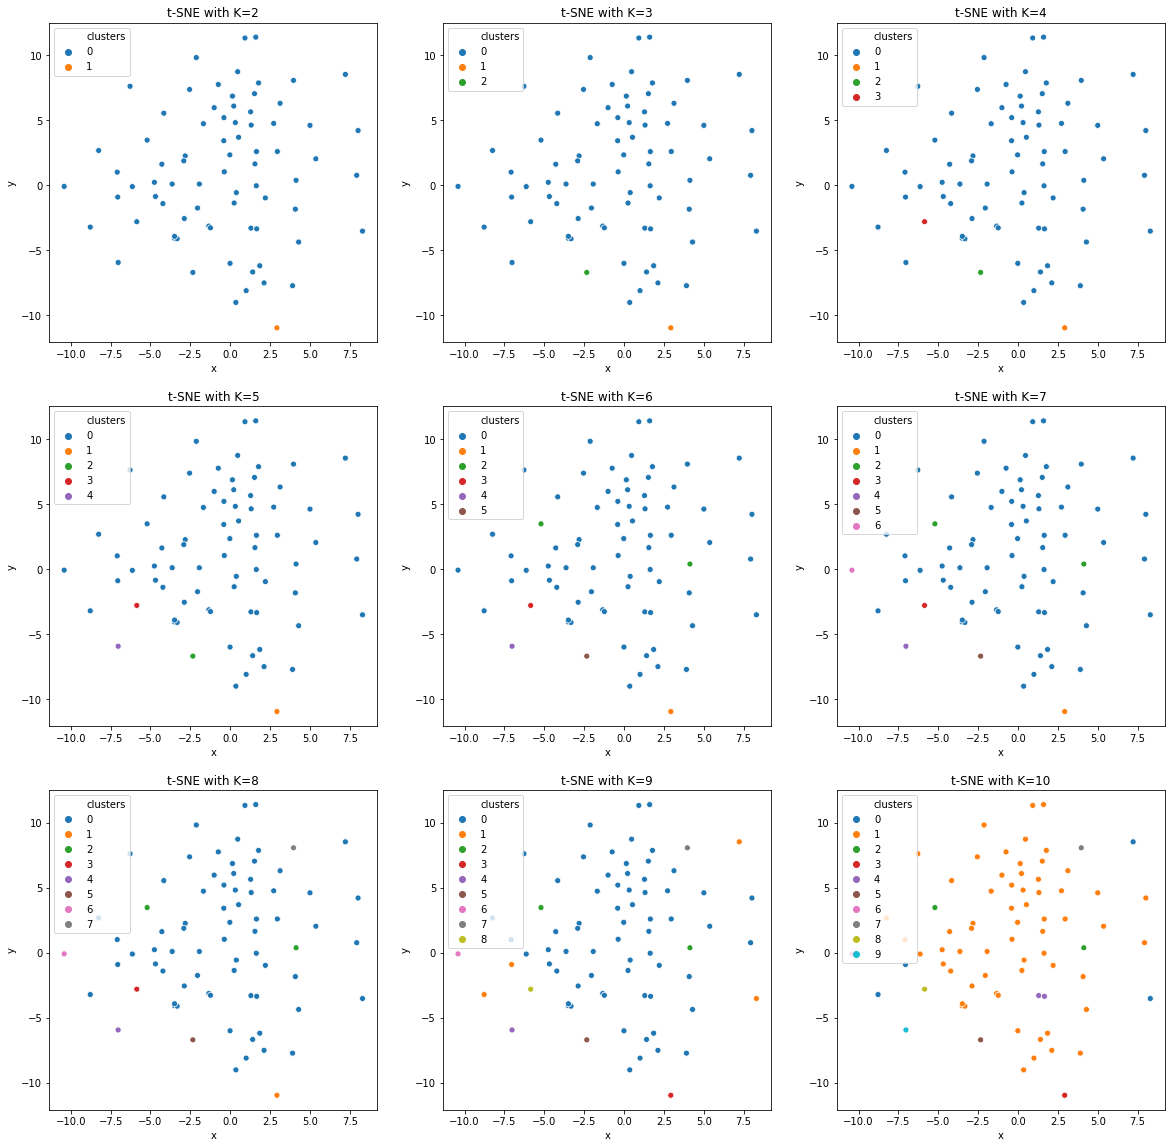

In [79]:
plot_results_tsne(df_plot_pca_xpca_tsne,all_hcapca_results['average'][1],clusters_test)

## 5. Evaluating Clustering Results

In this task you should compare the best results obtained using `K`-means and HCA 
1. **Without using ground truth**
2. **Using ground truth (`DIAGNOSIS`)**.

## 5.1. Without Using Ground Truth

**Choose one adequate measure** from those available by Sciki-learn (https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) to evaluate the different clusterings. 

Discuss the results.

In [44]:
from sklearn import metrics

In [45]:
Results = {
    "KMeans with all features": kmeans_output_vectors,
    "KMeans with XVariance": kmeans_var_output_vectors,
    "KMeans with PCA": kmeans_pca_output_vectors,
    "HCA with XVariance": all_hcavar_results['single'][1],
    "HCA with PCA": all_hcapca_results['average'][1],
}

### 5.1.1 Using Silhouette Score

In [46]:
best_results = {
    "Score":0,
    "K":0,
    "Model":"",
}
for result in Results:
    print(f"\n\n=================\nShowing results for {result}")
    for k_result in Results[result]:
        K = k_result["k"]
        Score = metrics.silhouette_score(X, k_result['clusters'], random_state=42)
        print(f"\n Result with {K} Clusters was = {Score:.3}")
        if Score > best_results["Score"]:
            best_results["K"] = K
            best_results["Model"] = result
            best_results["Score"] = Score
print("\n\n==================\n\nBest result was with {} and a K = {}\nThe Score was: {:.2}".format(best_results["Model"], best_results["K"], best_results["Score"]))



Showing results for KMeans with all features

 Result with 2 Clusters was = 0.0955

 Result with 3 Clusters was = 0.107

 Result with 4 Clusters was = 0.117

 Result with 5 Clusters was = 0.0906


Showing results for KMeans with XVariance

 Result with 2 Clusters was = 0.372

 Result with 3 Clusters was = 0.156

 Result with 4 Clusters was = 0.0271

 Result with 5 Clusters was = 0.03


Showing results for KMeans with PCA

 Result with 2 Clusters was = 0.111

 Result with 3 Clusters was = 0.105

 Result with 4 Clusters was = 0.103

 Result with 5 Clusters was = 0.109

 Result with 6 Clusters was = 0.0811

 Result with 7 Clusters was = 0.0933

 Result with 8 Clusters was = 0.108

 Result with 9 Clusters was = 0.11

 Result with 10 Clusters was = 0.123


Showing results for HCA with XVariance

 Result with 2 Clusters was = 0.372

 Result with 3 Clusters was = 0.156

 Result with 4 Clusters was = 0.0271

 Result with 5 Clusters was = 0.03

 Result with 6 Clusters was = 0.0551

 Result wi

Scores around zero indicate overlapping clusters.

The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

### 5.1.2 Calinski-Harabasz Index

In [47]:
best_results = {
    "Score":0,
    "K":0,
    "Model":"",
}
for result in Results:
    print(f"\n\n=================\nShowing results for {result}")
    for k_result in Results[result]:
        K = k_result["k"]
        Score = metrics.calinski_harabasz_score(X, k_result['clusters'])
        print(f"\n Result with {K} Clusters was = {Score:.3}")
        if Score > best_results["Score"]:
            best_results["K"] = K
            best_results["Model"] = result
            best_results["Score"] = Score
print("\n\n==================\n\nBest result was with {} and a K = {}\nThe Score was: {:.3}".format(best_results["Model"], best_results["K"], best_results["Score"]))



Showing results for KMeans with all features

 Result with 2 Clusters was = 11.9

 Result with 3 Clusters was = 11.7

 Result with 4 Clusters was = 9.8

 Result with 5 Clusters was = 8.46


Showing results for KMeans with XVariance

 Result with 2 Clusters was = 7.62

 Result with 3 Clusters was = 5.44

 Result with 4 Clusters was = 4.24

 Result with 5 Clusters was = 3.63


Showing results for KMeans with PCA

 Result with 2 Clusters was = 11.7

 Result with 3 Clusters was = 11.7

 Result with 4 Clusters was = 9.91

 Result with 5 Clusters was = 8.74

 Result with 6 Clusters was = 8.15

 Result with 7 Clusters was = 7.69

 Result with 8 Clusters was = 6.89

 Result with 9 Clusters was = 6.76

 Result with 10 Clusters was = 6.62


Showing results for HCA with XVariance

 Result with 2 Clusters was = 7.62

 Result with 3 Clusters was = 5.44

 Result with 4 Clusters was = 4.24

 Result with 5 Clusters was = 3.63

 Result with 6 Clusters was = 3.88

 Result with 7 Clusters was = 3.51

 

The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

### 5.1.3 Davies-Bouldin Index

In [48]:
best_results = {
    "Score":float("inf"),
    "K":0,
    "Model":"",
}
for result in Results:
    print(f"\n\n=================\nShowing results for {result}")
    for k_result in Results[result]:
        K = k_result["k"]
        Score = metrics.davies_bouldin_score(X, k_result['clusters'])
        print(f"\n Result with {K} Clusters was = {Score:.3}")
        if Score < best_results["Score"]:
            best_results["K"] = K
            best_results["Model"] = result
            best_results["Score"] = Score
print("\n\n==================\n\nBest result was with {} and a K = {}\nThe Score was: {:.3}".format(best_results["Model"], best_results["K"], best_results["Score"]))



Showing results for KMeans with all features

 Result with 2 Clusters was = 2.95

 Result with 3 Clusters was = 2.55

 Result with 4 Clusters was = 2.08

 Result with 5 Clusters was = 2.49


Showing results for KMeans with XVariance

 Result with 2 Clusters was = 0.498

 Result with 3 Clusters was = 0.687

 Result with 4 Clusters was = 0.843

 Result with 5 Clusters was = 0.888


Showing results for KMeans with PCA

 Result with 2 Clusters was = 2.97

 Result with 3 Clusters was = 2.54

 Result with 4 Clusters was = 2.22

 Result with 5 Clusters was = 2.17

 Result with 6 Clusters was = 2.54

 Result with 7 Clusters was = 2.31

 Result with 8 Clusters was = 1.84

 Result with 9 Clusters was = 1.97

 Result with 10 Clusters was = 1.89


Showing results for HCA with XVariance

 Result with 2 Clusters was = 0.498

 Result with 3 Clusters was = 0.687

 Result with 4 Clusters was = 0.843

 Result with 5 Clusters was = 0.888

 Result with 6 Clusters was = 0.843

 Result with 7 Clusters was

Zero is the lowest possible score. Values closer to zero indicate a better partition.

## 5.2. Using Ground Truth

**Choose one adequate measure** from those available by Sciki-learn (https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) to evaluate the different clusterings. 

Discuss the results.

### 5.2.1 Adjusted Rand index

adjusted Rand index is a function that measures the similarity of the two assignments, ignoring permutations and with chance normalization:

In [49]:
best_results = {
    "Score":0,
    "K":0,
    "Model":"",
}
for result in Results:
    print(f"\n\n=================\nShowing results for {result}")
    for k_result in Results[result]:
        K = k_result["k"]
        Score = metrics.adjusted_rand_score(y, k_result['clusters'])
        print(f"\n Result with {K} Clusters was = {Score:.3}")
        if Score > best_results["Score"]:
            best_results["K"] = K
            best_results["Model"] = result
            best_results["Score"] = Score
print("\n\n==================\n\nBest result was with {} and a K = {}\nThe Score was: {:.3}".format(best_results["Model"], best_results["K"], best_results["Score"]))



Showing results for KMeans with all features

 Result with 2 Clusters was = 0.0127

 Result with 3 Clusters was = 0.121

 Result with 4 Clusters was = 0.143

 Result with 5 Clusters was = 0.107


Showing results for KMeans with XVariance

 Result with 2 Clusters was = -0.0148

 Result with 3 Clusters was = 0.0114

 Result with 4 Clusters was = -0.00355

 Result with 5 Clusters was = -0.017


Showing results for KMeans with PCA

 Result with 2 Clusters was = -0.0029

 Result with 3 Clusters was = 0.113

 Result with 4 Clusters was = 0.144

 Result with 5 Clusters was = 0.104

 Result with 6 Clusters was = 0.103

 Result with 7 Clusters was = 0.107

 Result with 8 Clusters was = 0.0733

 Result with 9 Clusters was = 0.115

 Result with 10 Clusters was = 0.137


Showing results for HCA with XVariance

 Result with 2 Clusters was = -0.0148

 Result with 3 Clusters was = 0.0114

 Result with 4 Clusters was = -0.00355

 Result with 5 Clusters was = -0.017

 Result with 6 Clusters was = 0.0

In [50]:
best_results = {
    "Completeness Score": 0,
    "Homogeneity Score": 0,
    "V-Measure Score": 0,
    "K":0,
    "Model":"",
}
for result in Results:
    print(f"\n\n=================\nShowing results for {result}")
    for k_result in Results[result]:
        K = k_result["k"]
        Score = metrics.v_measure_score(y, k_result['clusters']) # beta = 1.0
        print(f"\n Result with {K} Clusters was = {Score:.3}")
        if Score > best_results["V-Measure Score"]:
            best_results["K"] = K
            best_results["Model"] = result
            best_results["Completeness Score"] = metrics.completeness_score(y, k_result['clusters'])
            best_results["Homogeneity Score"] = metrics.homogeneity_score(y, k_result['clusters'])
            best_results["V-Measure Score"] = Score
print("\n\n==================\n\nBest result was with {} and a K = {}\nThe Completeness Score was: {:.3}\nThe Homogeneity Score was: {:.3}".format(
            best_results["Model"],
            best_results["K"],
            best_results["Completeness Score"],
            best_results["Homogeneity Score"]
        )
     )



Showing results for KMeans with all features

 Result with 2 Clusters was = 0.0148

 Result with 3 Clusters was = 0.143

 Result with 4 Clusters was = 0.158

 Result with 5 Clusters was = 0.135


Showing results for KMeans with XVariance

 Result with 2 Clusters was = 0.0223

 Result with 3 Clusters was = 0.0637

 Result with 4 Clusters was = 0.0751

 Result with 5 Clusters was = 0.085


Showing results for KMeans with PCA

 Result with 2 Clusters was = 0.00112

 Result with 3 Clusters was = 0.145

 Result with 4 Clusters was = 0.18

 Result with 5 Clusters was = 0.162

 Result with 6 Clusters was = 0.21

 Result with 7 Clusters was = 0.202

 Result with 8 Clusters was = 0.202

 Result with 9 Clusters was = 0.251

 Result with 10 Clusters was = 0.287


Showing results for HCA with XVariance

 Result with 2 Clusters was = 0.0223

 Result with 3 Clusters was = 0.0637

 Result with 4 Clusters was = 0.0751

 Result with 5 Clusters was = 0.085

 Result with 6 Clusters was = 0.111

 Result

homogeneity: each cluster contains only members of a single class.

completeness: all members of a given class are assigned to the same cluster.

We can turn those concept as scores homogeneity_score and completeness_score. Both are bounded below by 0.0 and above by 1.0 (higher is better)

Their harmonic mean called V-measure is computed by v_measure_score

## 6. Clustering Patients using Density-based Clustering

Use DBSCAN (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) or OPTICS (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html) to cluster the patients.

Compare the results with those of K-means and HCA.

In [81]:
from sklearn.cluster import DBSCAN

In [152]:
def dbscan_clustering(data, eps, min_sample):
    results_all = []
    indexes = []
    dbscan_output_vectors = []
    for i, c in enumerate(eps):
        data2 = data.copy()
        indexes.append(c)
        dbscan = DBSCAN(eps=c, min_samples=min_sample).fit(data2)
        data2['cluster'] = dbscan.labels_
        data2['target'] = y
        dbscan_output_vectors.append({'eps':c, 'clusters': data2['cluster']})
        clusters_uniques = np.unique(data2['cluster'])
        results = {}
        for c2 in clusters_uniques:
            all_len = len(data2[(data2['cluster']==c2)&(data2['target']=='ALL')])
            aml_len = len(data2[(data2['cluster']==c2)&(data2['target']=='AML')])
            results[c2] = {'ALL':all_len, 'AML':aml_len}
        results_all.append(results)
    return pd.DataFrame(results_all, index = indexes), dbscan_output_vectors

def plot_results_dbscan(eps, df_results, df_clusters_vectors):
    num_columns = 3
    num_rows = math.ceil((len(eps)/num_columns))
    f, axs = plt.subplots(nrows= num_rows, ncols = num_columns,figsize=(20,20))
    if len(eps) > num_columns: plots = np.concatenate(axs)
    else:plots = axs
    
    silh_all = []
    for i, e in enumerate(eps):
        df_results_e = get_results(df_results, e)
        silh = round(silhouette_score(X, next(item for item in df_clusters_vectors if item["eps"] == e)['clusters'], random_state=42),2)
        silh_all.append(silh)
        title = 'EPS = {:.2}; AVG Silhouette score: {}'.format(e, silh )
        plot_clusters_by_diagnosis(df_results_e,plots[i],title)
    return silh_all

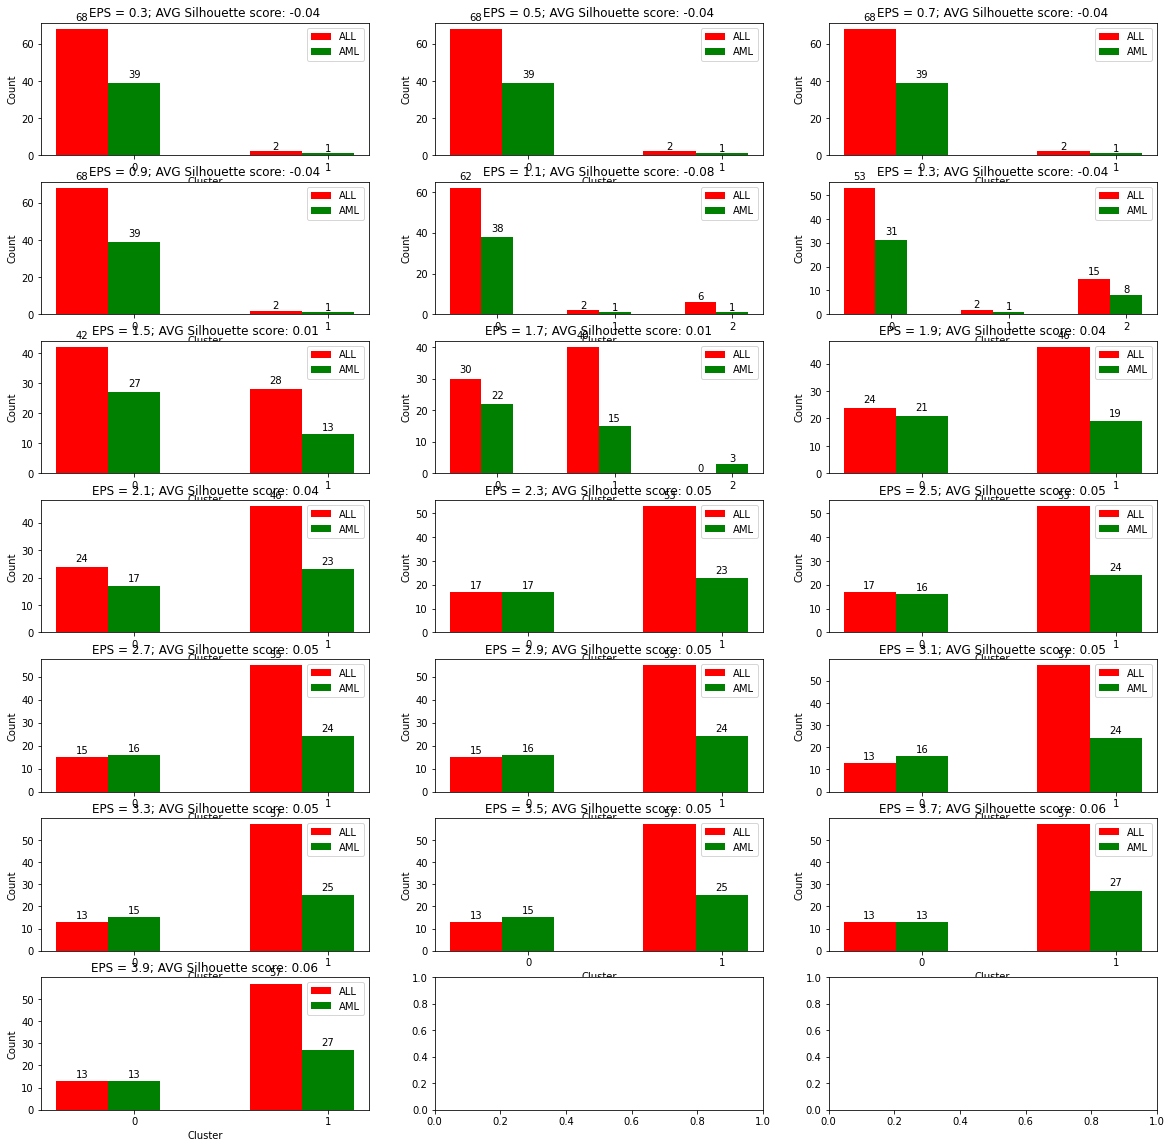

In [162]:
eps = list(np.arange(0.3,4,0.2))
df_dbscan_results , dbscan_output_vectors = dbscan_clustering(pd.DataFrame(X_variance), eps=eps, min_sample=3)
silh_all = plot_results_dbscan(eps,df_dbscan_results,dbscan_output_vectors)
plt.show()

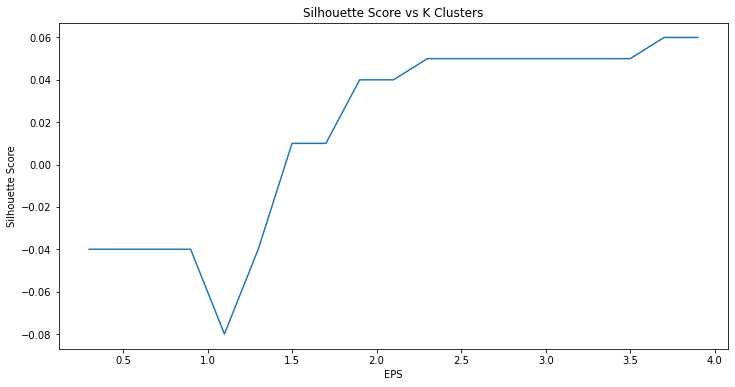

In [163]:
plot_silhouettescore(eps, silh_all, measure="EPS")

Higher silhouette score with EPS at 4.0 of EPS, but still very low.

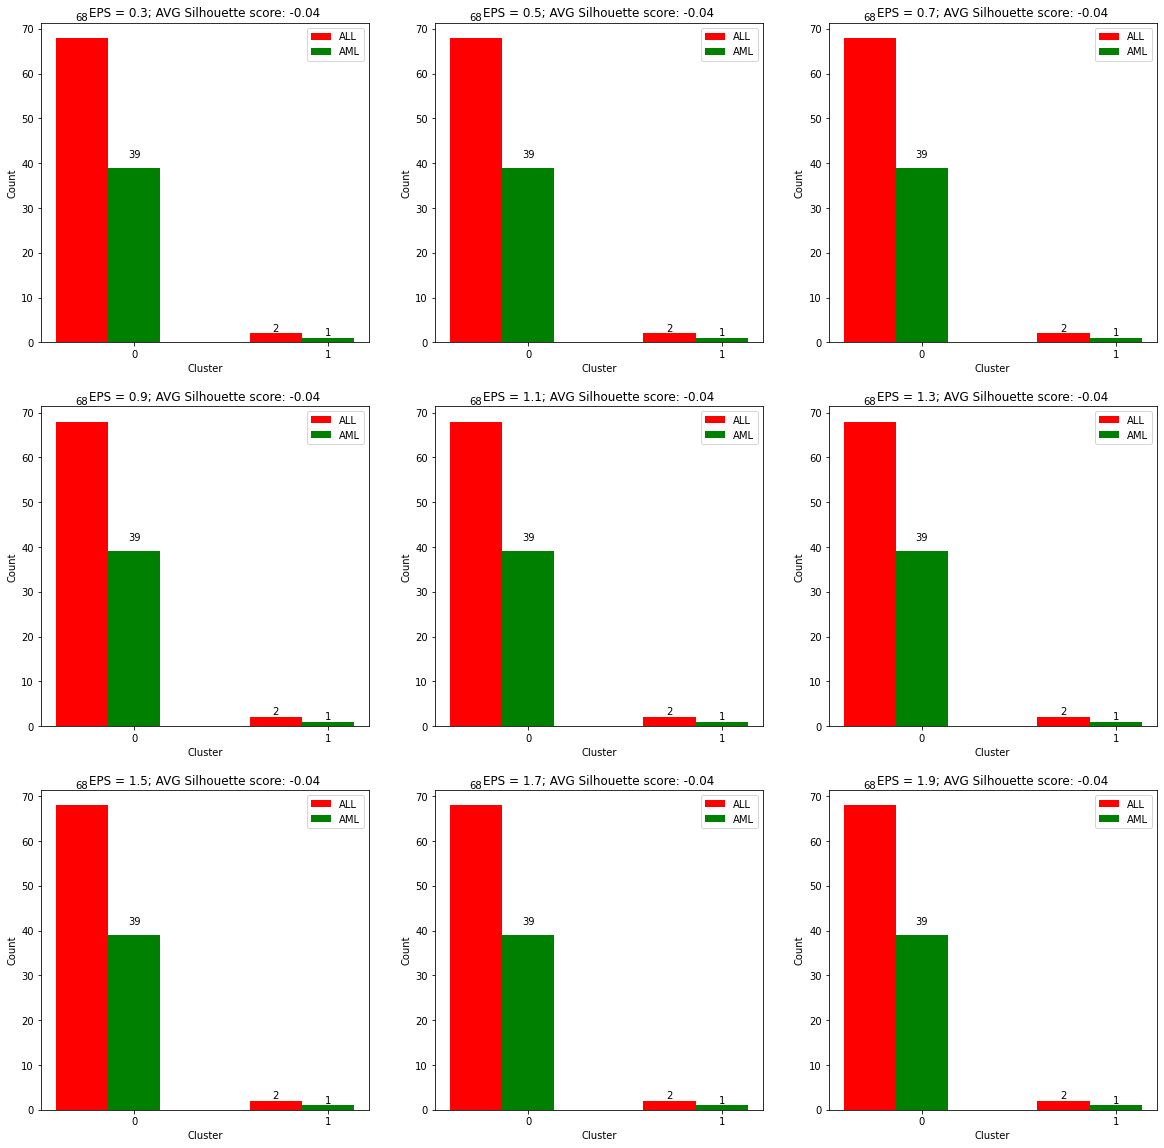

In [167]:
eps = list(np.arange(0.3,2,0.2))
df_dbscan_results , dbscan_output_vectors = dbscan_clustering(pd.DataFrame(X_PCA), eps=eps, min_sample=3)
silh_all = plot_results_dbscan(eps,df_dbscan_results,dbscan_output_vectors)
plt.show()

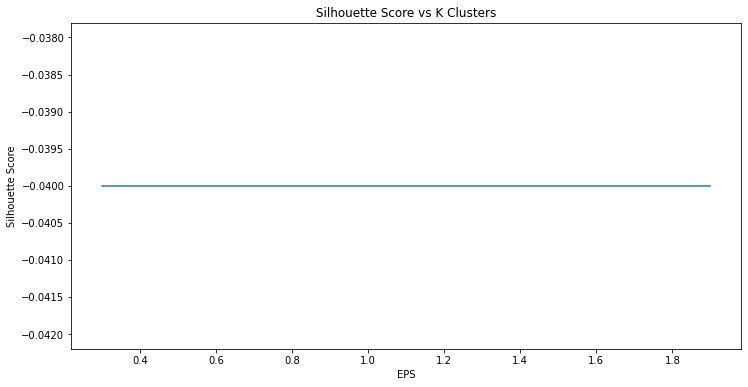

In [168]:
plot_silhouettescore(eps, silh_all, measure="EPS")

No change with EPS. The Silhouette score was low for all of them.